#**M2 Lead Qualification Dataset**


The original [source](https://www.kaggle.com/code/ashydv/lead-scoring-logistic-regression/notebook) of the data describes the setting as follows:


```
# This is formatted as code
```


"An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.

When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’."

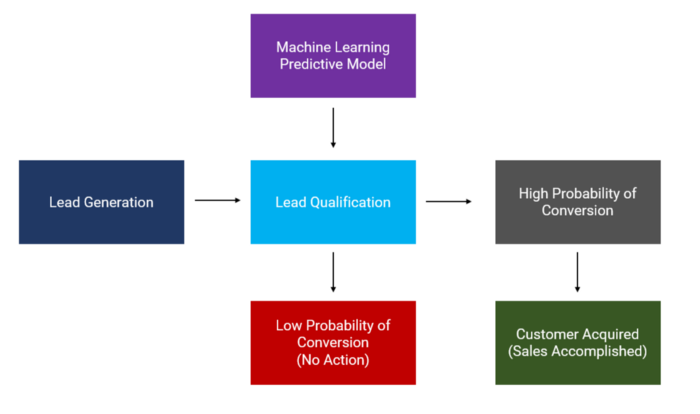

Source: https://towardsdatascience.com/predict-lead-score-the-right-way-using-pycaret-332faa780cfc Fair use claimed.

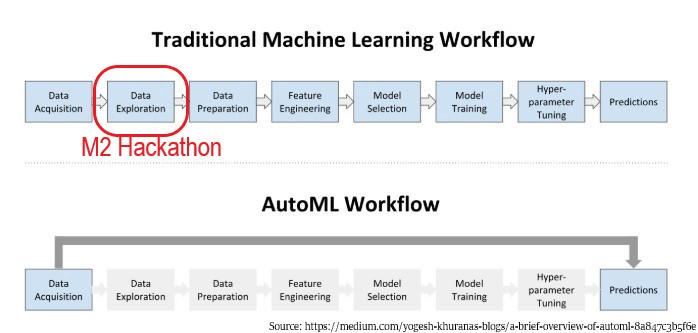

#**Table of Contents**
* Business Problem
* BLUF
* Libraries
* Data
* Missing Values
* Duplicates
* Descriptive Statistics
* Interactive Visualizations
* Automated Visualizations
* Conclusions

#**Business Problem**
The business problem in this notebook is to explore the lead qualification data with a view to a) identifying data preparation needs for development of a machine learning classifier that can classify leads, and b) form inferences about relationships between the features and identify productive leads.

#**BLUF** 
(Bottom Line Up Front)

Many features have missing values, and some have a majority of instances with missing values. There are no duplicates One-hot encoding needed for categorical features, but the categories with low frequencies need to be bucketed first. The target ('Converted') is unbalanced (38.54%). Many features have a dominant value and can likely be deleted Quant variables can be trimmed to address outlier issues.

#**Libraries**

In [ ]:
# Basic Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats.mstats import winsorize
import scipy.stats as ss
import math

In [ ]:
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [ ]:
!pip install --upgrade plotly   # you may need to pip install plotly
!pip install jupyter-dash       # you may need to install jupyter-dash

import plotly.graph_objects as go
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output 

     |████████████████████████████████| 27.7 MB 45.6 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
     |████████████████████████████████| 9.6 MB 7.6 MB/s 
     |████████████████████████████████| 357 kB 53.4 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=fdc205cf9de66745c34cb9bd892d95bbb9c5410cad729bae54a841fc6296695d
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  


In [ ]:
!pip install sweetviz     # You may need to pip install sweetviz
import sweetviz as sv

     |████████████████████████████████| 15.1 MB 340 kB/s 


In [ ]:
# !pip install autoviz    # Installs AutoViz
# #importing Autoviz class
# from autoviz.AutoViz_Class import AutoViz_Class#Instantiate the AutoViz class
# AV = AutoViz_Class()

#**Data**

The data was sourced from here: https://www.kaggle.com/code/ashydv/lead-scoring-logistic-regression/comments

Data dictionary:
The features re not well documented in hte source, but are mostlyu eself explanatory and deal with the source of the lead, how long the prospect has spent on activities on the website
* Lead Number
* Lead Origin
* Lead Source 
* Do Not Email
* Do Not Call
* TotalVisits
* Total Time Spent on Website
* Page Views Per Visit
* Last Activity
* Country
* Specialization
* How did you hear about X Education
* What is your current occupation
* What matters most to you in choosing a course
* Search
* Magazine
* Newspaper Article
* X Education Forums
* Newspaper
* Digital Advertisement
* Through Recommendations
* Receive More Updates About Our Courses
* Tags
* Lead Quality
* Update me on Supply Chain Content
* Get updates on DM Content
* Lead Profile
* City
* Asymmetrique Activity Index
* Asymmetrique Profile Index
* Asymmetrique Activity Score
* Asymmetrique Profile Score
* I agree to pay the amount through cheque
* A free copy of Mastering The Interview
* Last Notable Activity
* Converted (whether the lead converted - this is the target variable)

In [ ]:
# Read Data
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

# Read 
# Source of data: https://www.kaggle.com/danofer/lead-scoring
file_ = "drive/My Drive/Colab Notebooks/Big Data ML/New BDML/Data/Marketing_Leads_India.csv"   # adapt this as needed to the file structure on your Google drive
df = pd.read_csv(file_) # read in csv file

Mounted at /content/drive


In [ ]:
# Ensure maximum display for pandas
pd.set_option('display.max_columns', None)

# Shape of df
print("Shape", df.shape)

# Check data types
print(df.info())

# Head  tail of df
print(df.head())
print(df.tail())

Shape (9240, 36)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                      

#**Missing Values**

Missing values may distort the quality of the learning process in the case of some algorithms. Other algorithnms are less sensitive.

Possible fixs for missing valeus include:
* DO NOTHING.
  * Pros: Easy, doesn’t bias the data set, and some algorithms will be OK (XGBoost, lightGMB)
  * Cons: Some algorithms will be excluded 
* IMPUTE MEDIAN/MEAN VALUES.
  * Pros: Easy and fast.
  * Cons: Doesn’t work well with categorical variables, reduces variance of data, ignores correlations between predictors
* IMPUTE USING MOST FREQUENT or ZERO/CONSTANT VALUE
  * Pros: works OK on categorical variables
  * Cons: Introduces bias, doesn’t factor correlations between predictors
* IMPUTE USING kNN
  * Pros: much better than mean/median
  * Cons: kNN is sensitive to outliers, quality of imputation depends on the data
* IMPUTE BY DEEP LEARNING
  * Pros: high quality imputation
  * Cons: slow
* IMPUTE USING MULTIVARIATE IMPUTATION BY CHAINED EQUATION (MICE)
* IMPUTE BY EXTRAPOLATION/INTERPOLATION
* HOT-DECK IMPUTATION (random substitutions)

An imputer is an algorithm that can be used to replace NaNs (missing values) by the median or some other method. 

See [this](https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779) for some discussion of these ideas.



Missing Values
 Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                             0
Specialization                                      0
How did you hear about X Education               7250
What is your current occupation                     0
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Educatio

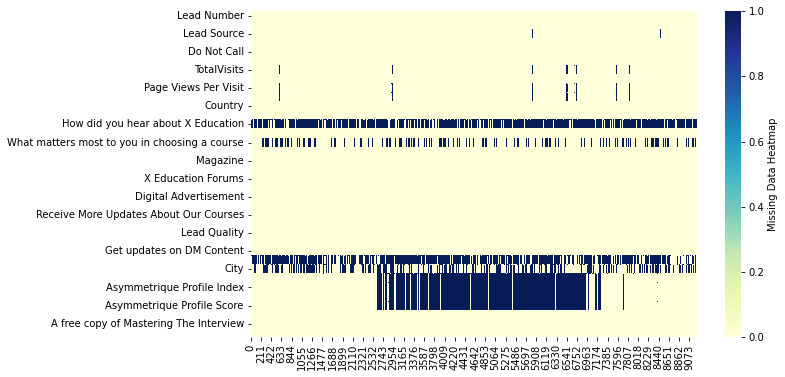

In [ ]:
# Check for missing values
print('\n\nMissing Values\n',df.isnull().sum(axis=0))

# Missing value heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data Heatmap'})
plt.show()

#**Duplicates**

It's important to check for duplicates: they may bias the learning process of many ML algorithms if instances are randomly selected and presented to an algorithm during training. Duplicates, in this process, amount to an instance getting more than one shot at influencing algorithm behavior.
Be careful when slicing data! One can go from having no duplicates to suddenly having thousands of duplicates after dropping features (deleting columns).

Guidelines:
* Generally, remove duplicates
* Duplicates may not impact model quality very much if there are only a small number
* Pandas: df = df.drop_duplicates()


In [ ]:
# Check for duplicates
print('\n Duplicates\n',df.duplicated().sum())


 Duplicates
 0


#**Descriptive Statistics**

Descriptive statistics entails the production and interpretation of both visualizations and numerical statistics.
* Numerical univariate statistics: mean, median, mode, trimmed mean, standard deviation, skewness, kurtosis, quartiles, IQR, range, etc.
* Numerical bivariate statistics: correlation, covariance, crosstabs, etc.
* Univariate graphs: box plots, violin plots, bar charts, histograms (i.e., prefer to avoid pie charts!)
* Bivariate & multivariate graphs: scatter plots, line charts, stacked/grouped histograms, stacked/grouped bar charts, side-by-side box plots, parallel coordinate plots, scatterplot matrices (“pairplots”), etc.  

In [ ]:
# Numerically encode target so that it appears in, for example, pairplots
df = pd.get_dummies(data=df, columns=['Converted'],drop_first=True)

In [ ]:
# Descriptive univariate numefrical statistics
df.describe()

Lead Number  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9103.000000                  9240.000000   
mean   617188.435606     3.445238                   487.698268   
std     23405.995698     4.854853                   548.021466   
min    579533.000000     0.000000                     0.000000   
25%    596484.500000     1.000000                    12.000000   
50%    615479.000000     3.000000                   248.000000   
75%    637387.250000     5.000000                   936.000000   
max    660737.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  Converted_1  
count                 5022.000000  9240.000000  
mean                    16.344883     0.385390  
std                      1.811395     0.486714  
min                     11.000000     0.000000  
25%                     15.000000     0.000000  
50%                     16.000000     0.000000  
75%                     18.000000     1.000000  
max                     20.000000     1.000000

int64


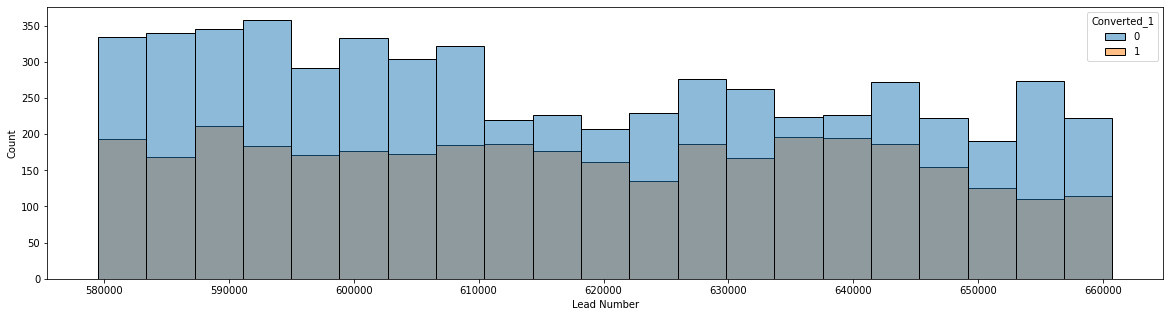

object


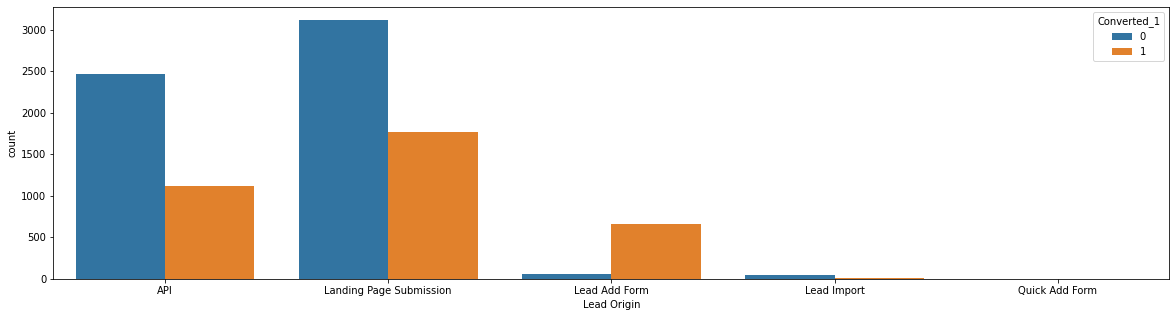

object


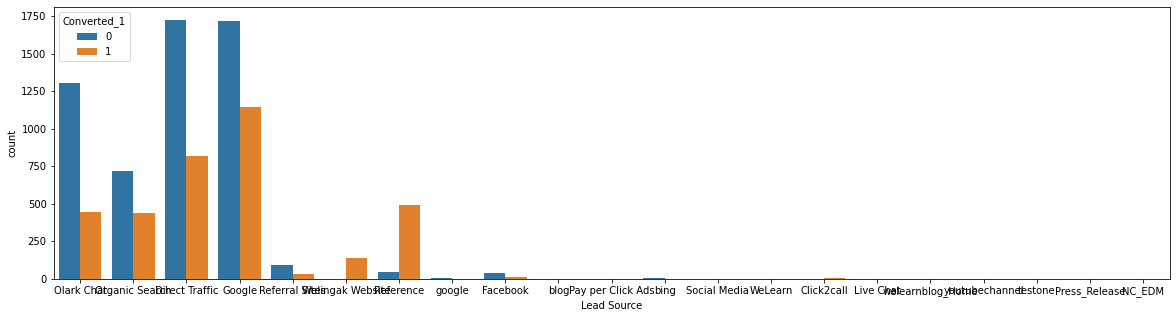

object


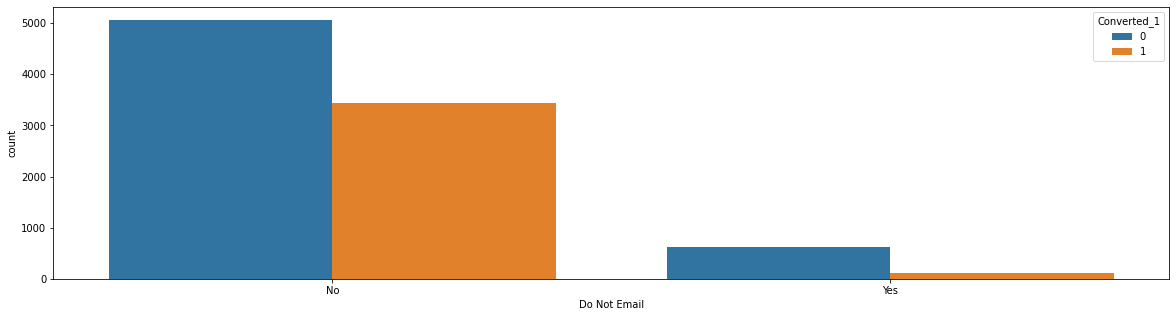

object


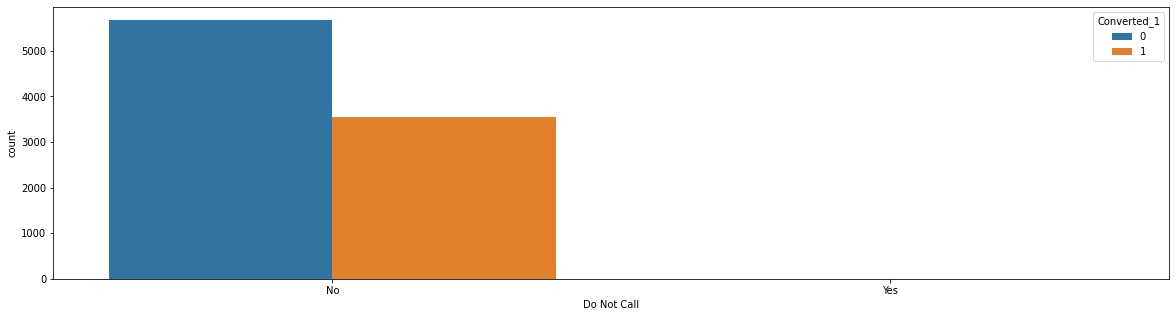

float64


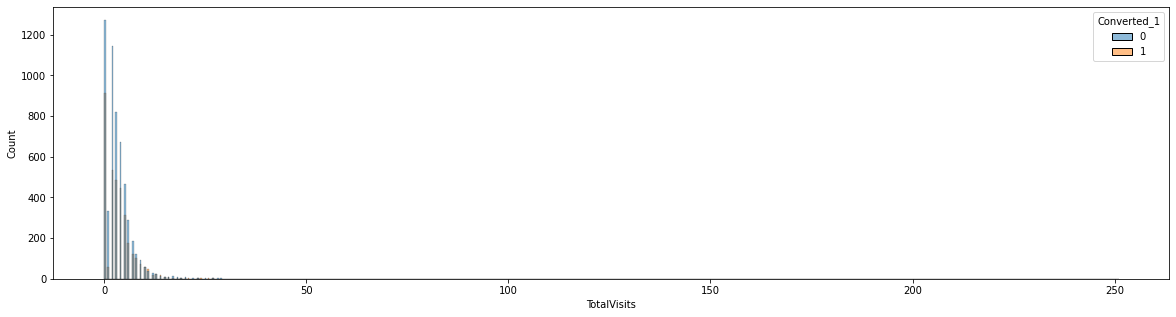

int64


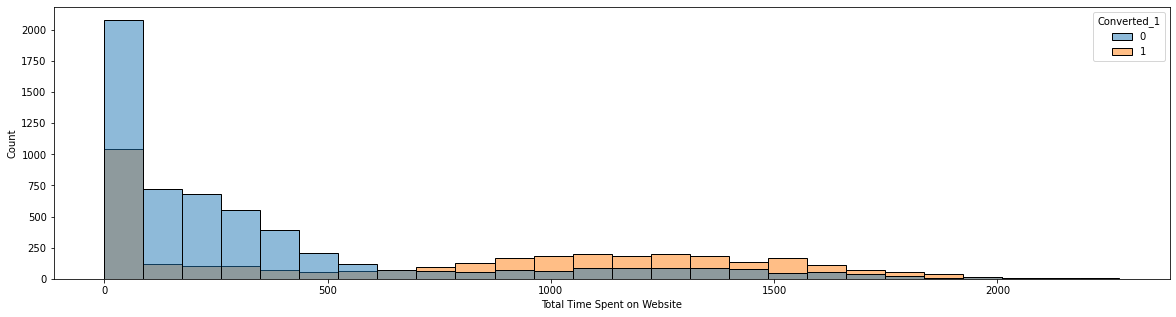

float64


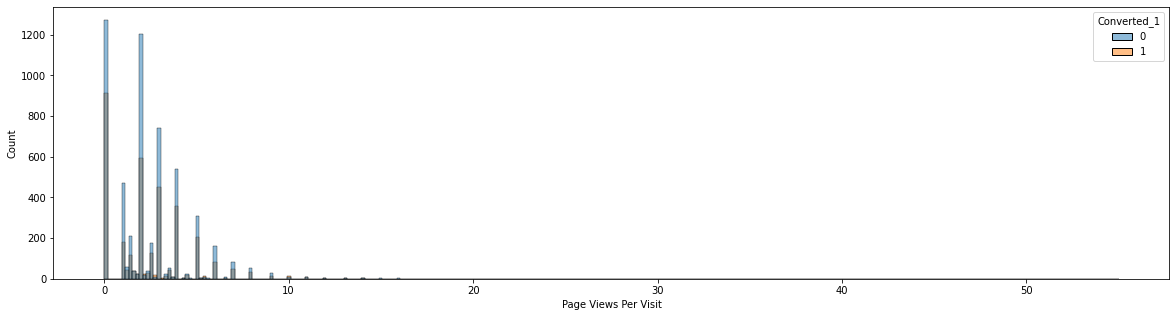

object


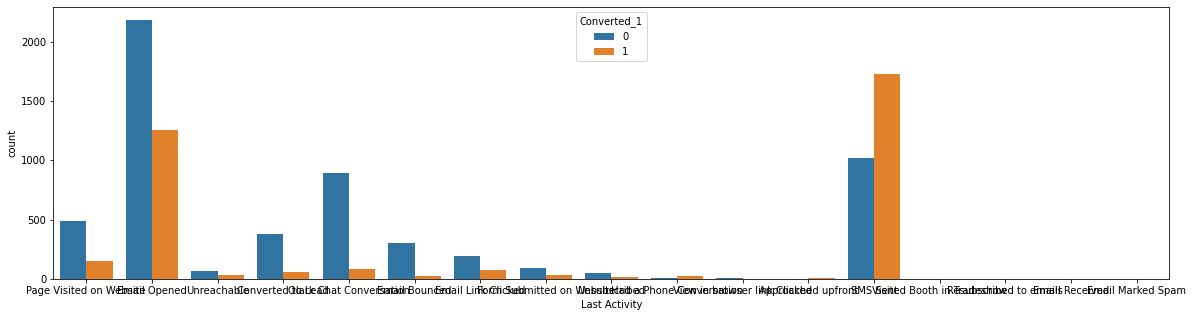

object


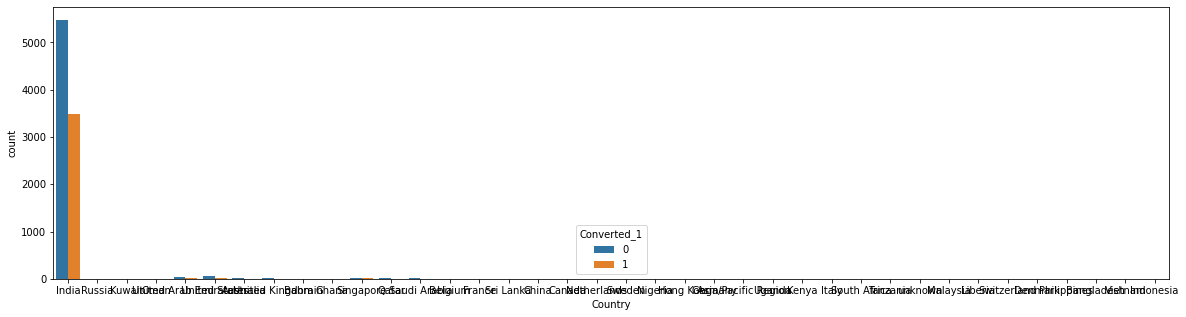

object


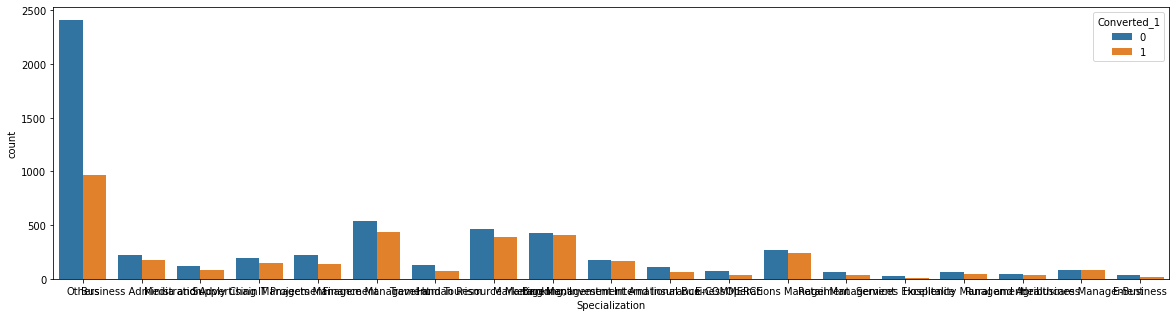

object


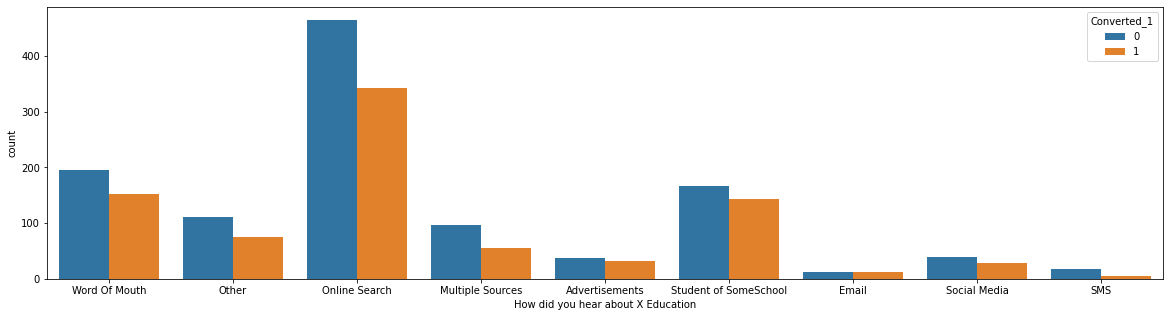

object


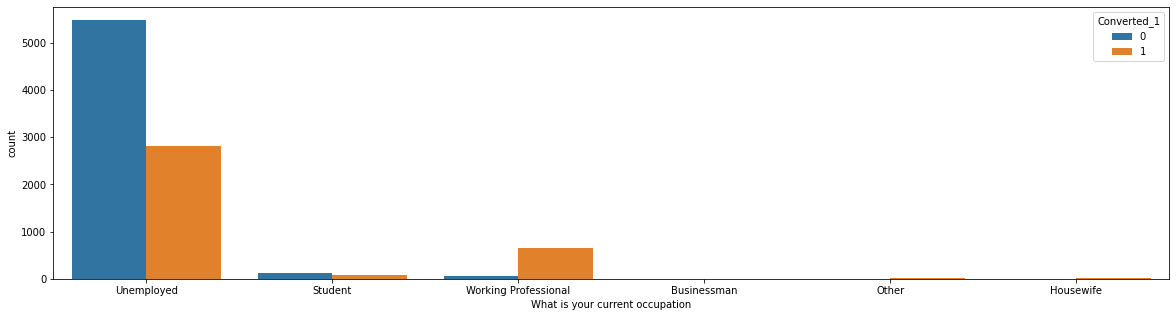

object


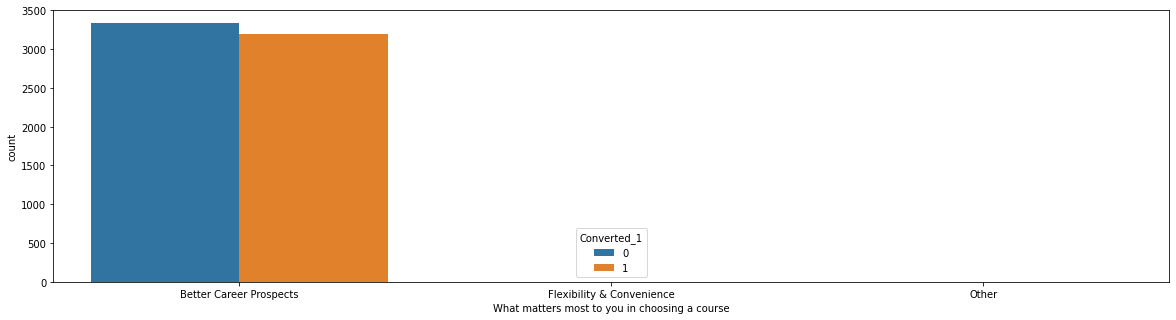

object


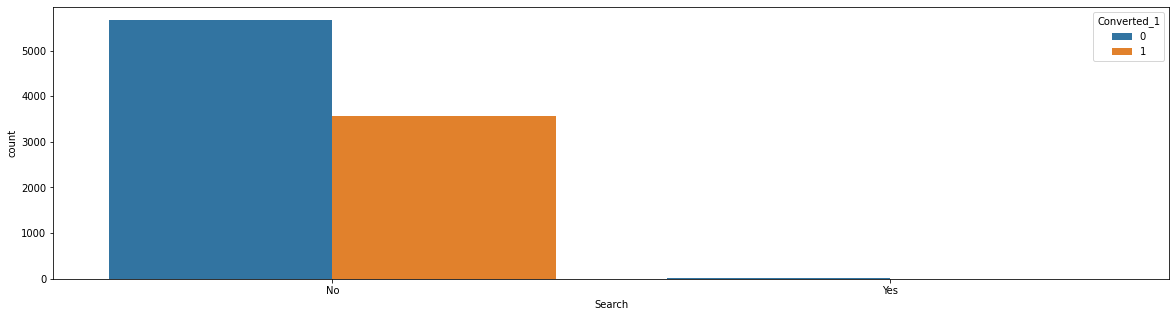

object


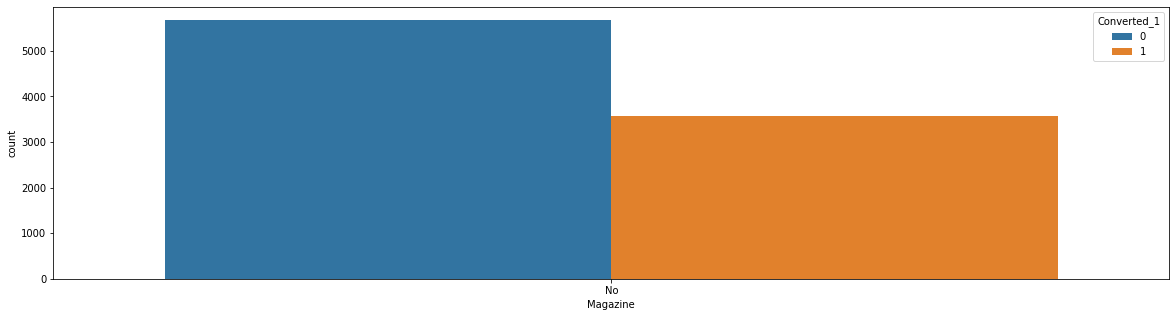

object


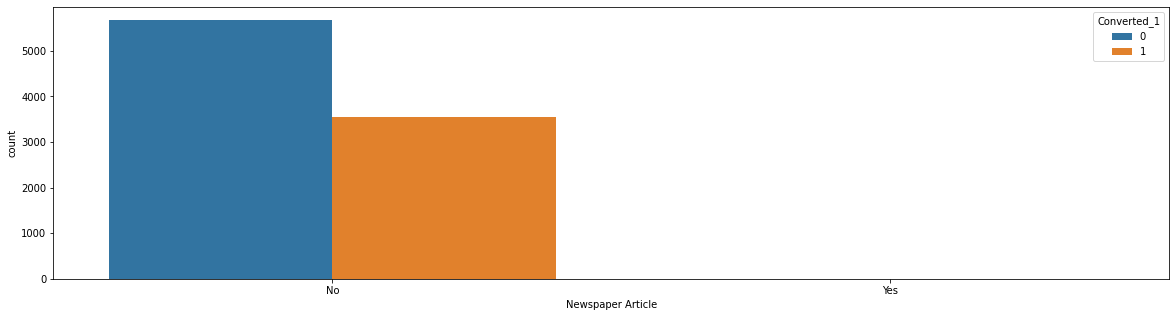

object


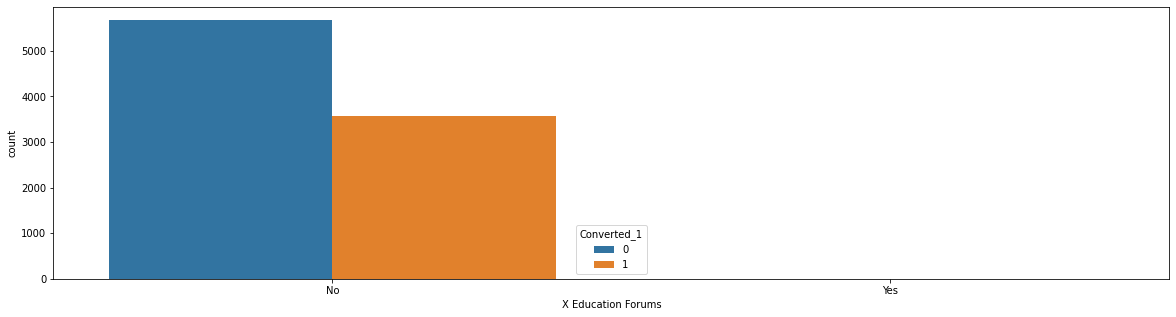

object


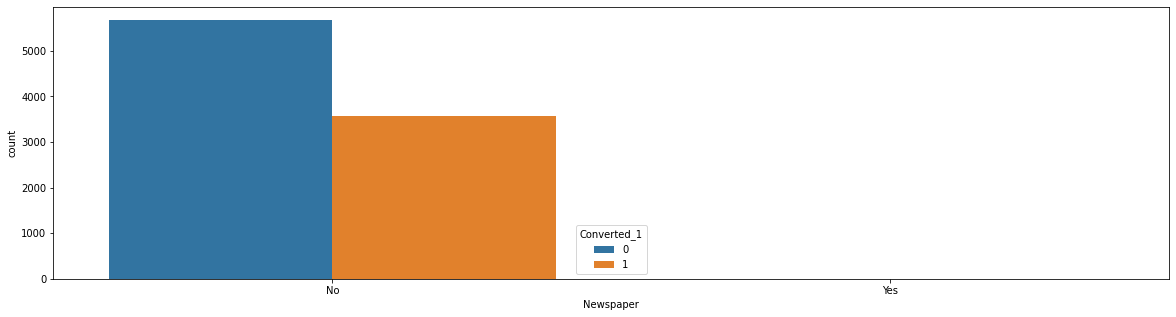

object


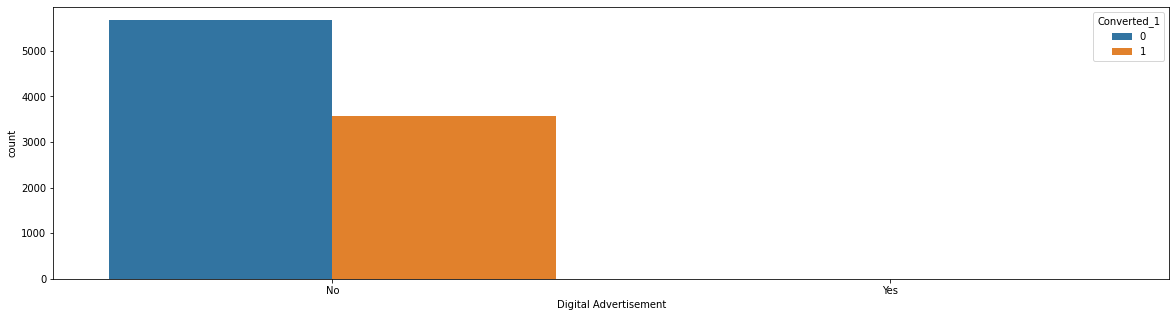

object


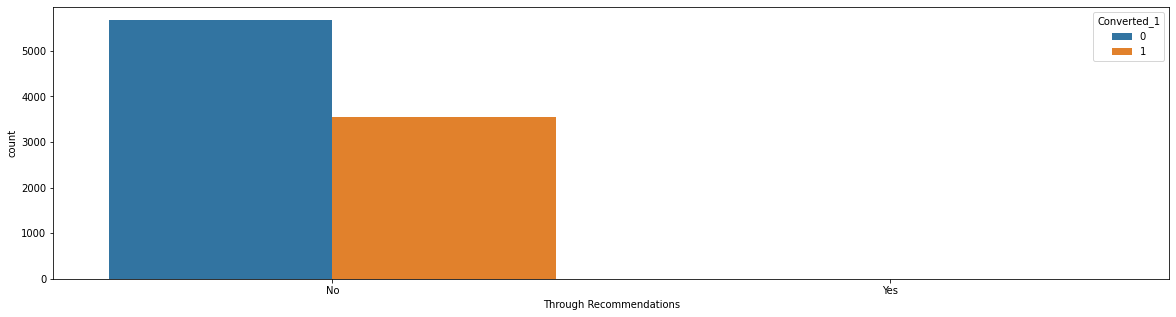

object


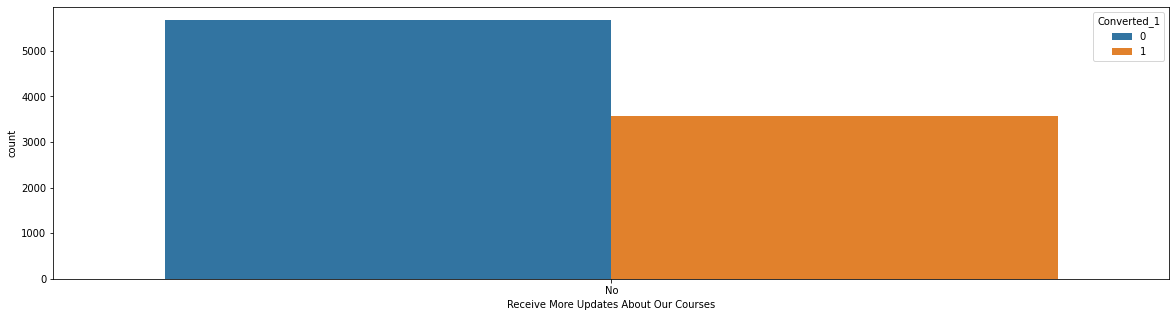

object


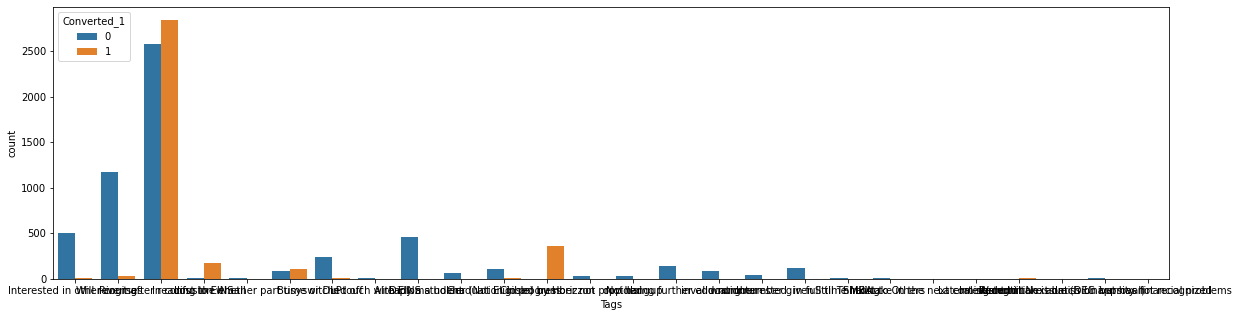

object


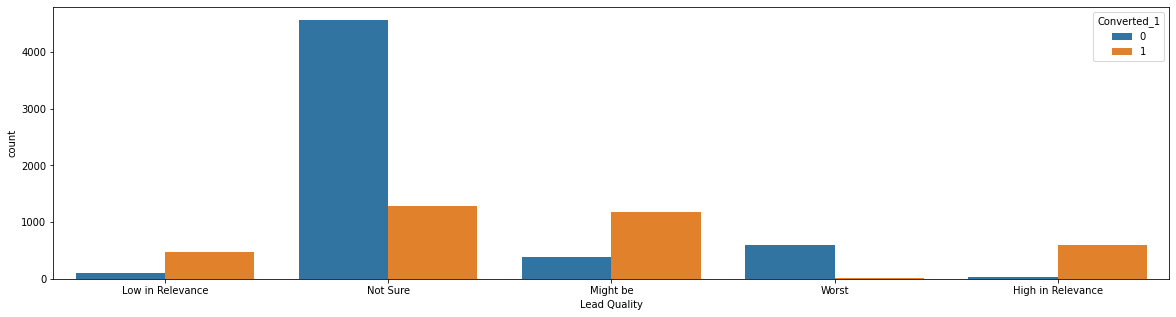

object


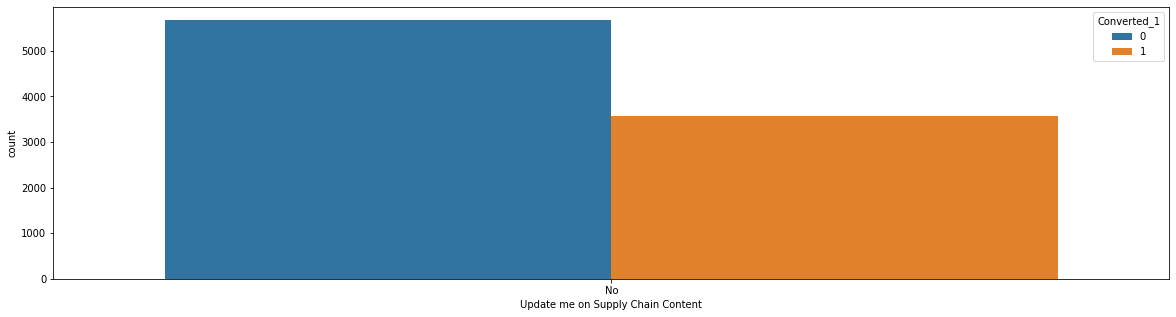

object


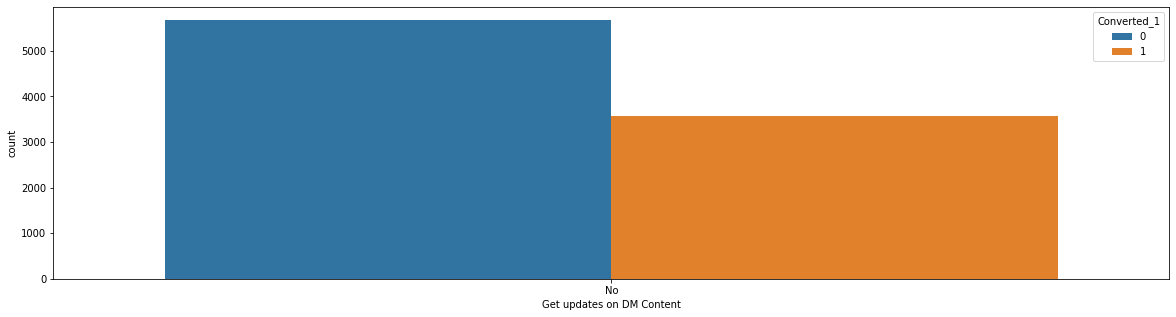

object


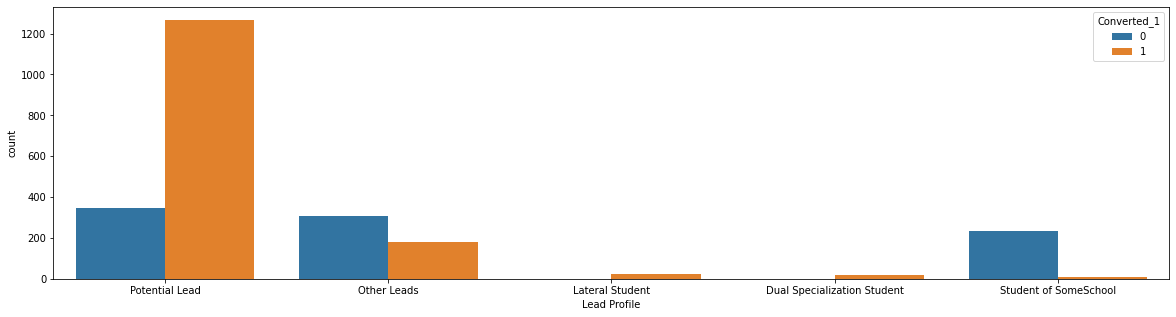

object


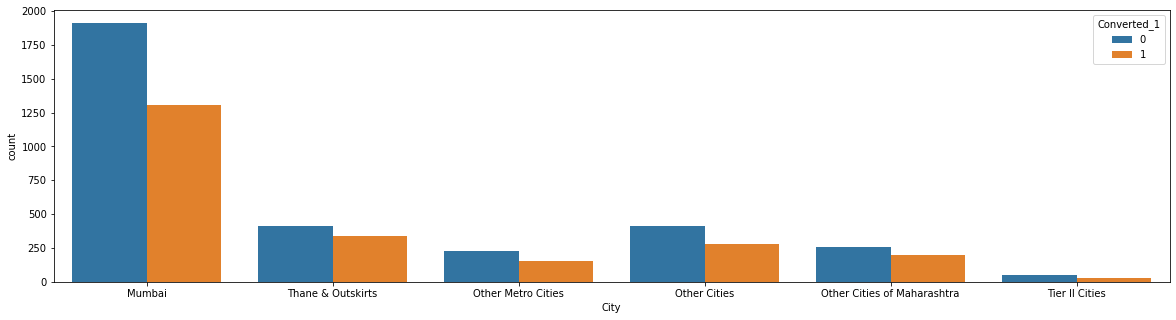

object


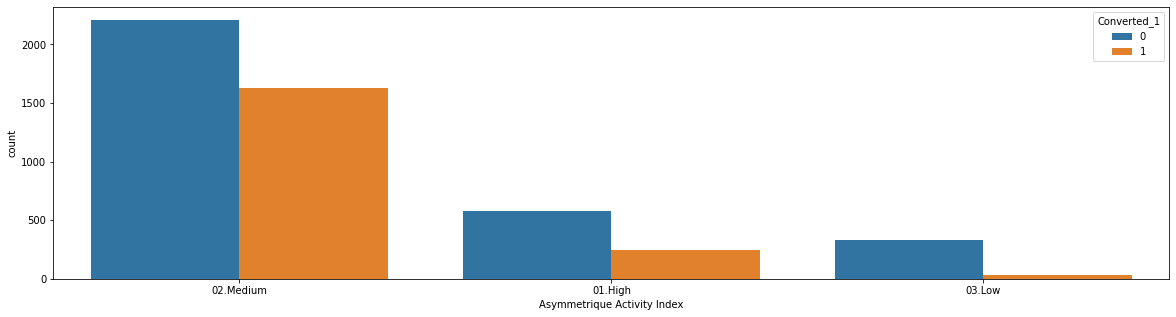

object


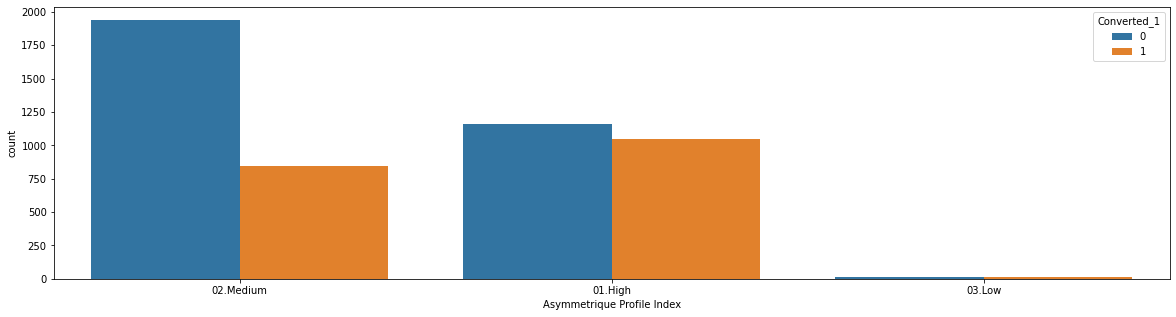

float64


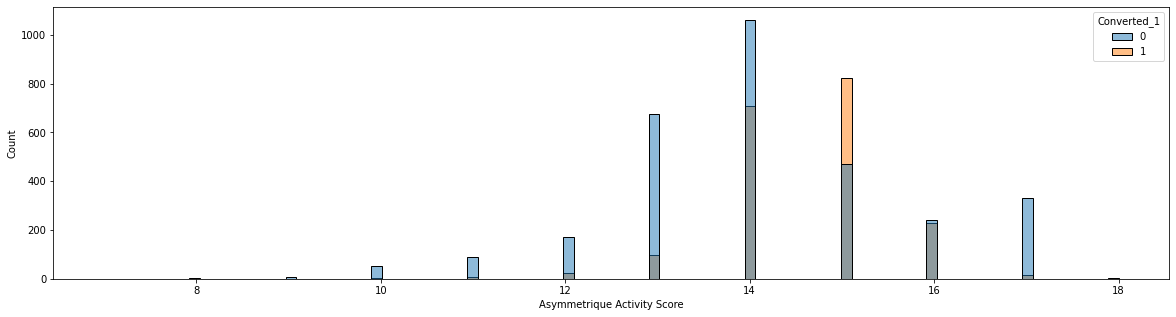

float64


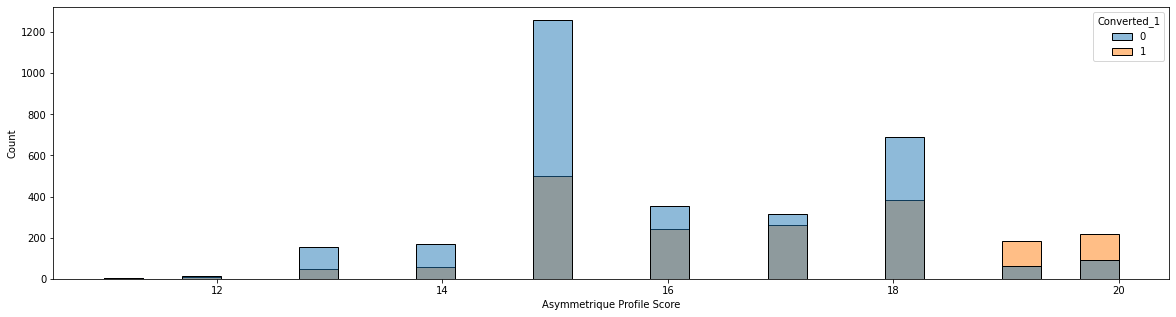

object


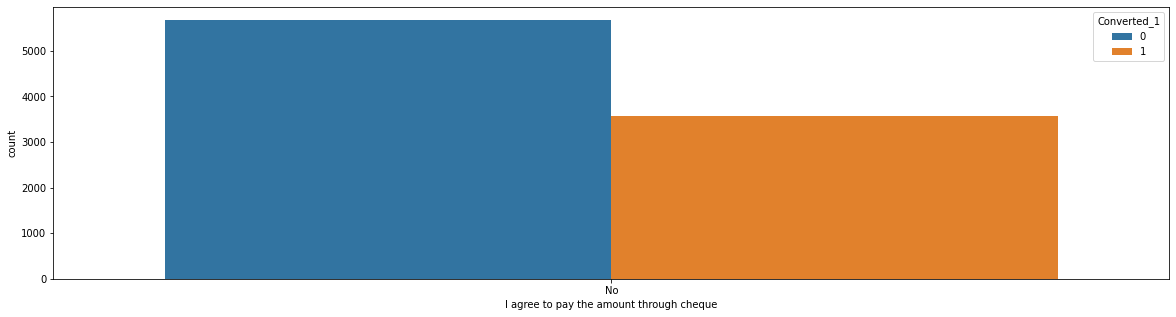

object


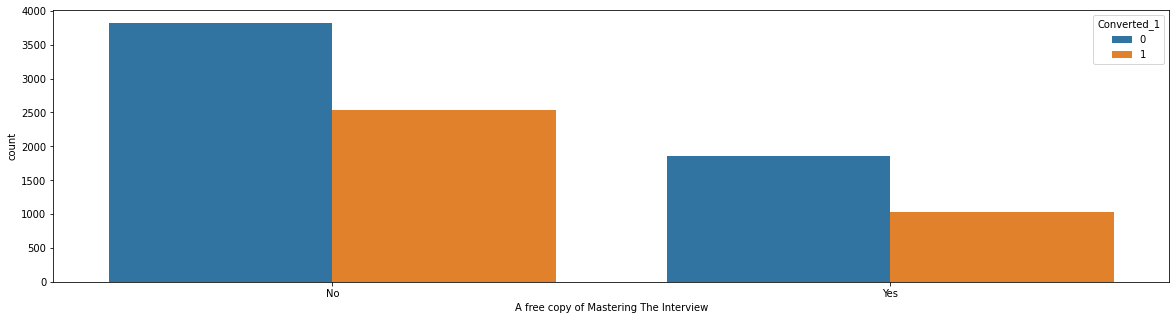

object


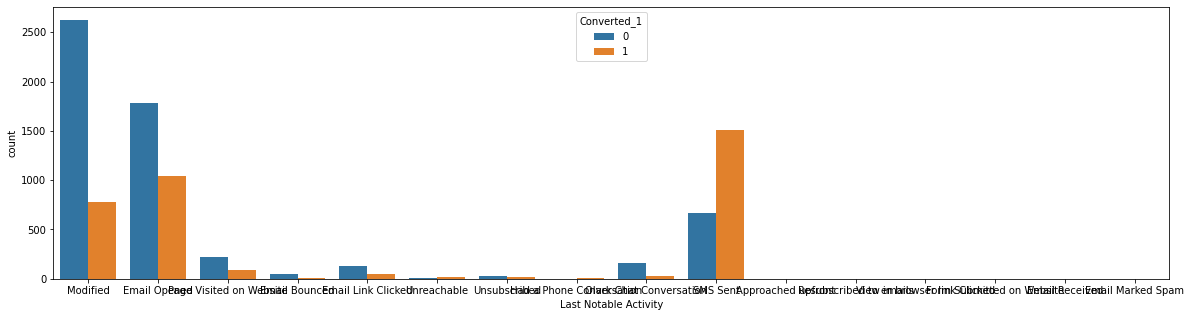

uint8


In [ ]:
# Countplot categoricals and histograms for quant variables
for i in df.columns:
  print(df.dtypes[i])
  if df.dtypes[i] == 'object':
    plt.figure(figsize = (20,5))
    sns.countplot(x = i, hue = "Converted_1", data = df)
    plt.show()
  if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':
    plt.figure(figsize = (20,5))
    sns.histplot(x = i, hue = "Converted_1", data = df)
    plt.show()

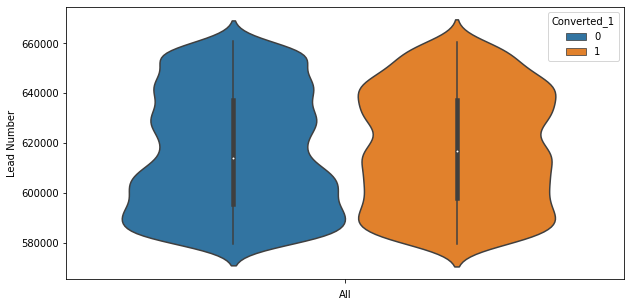

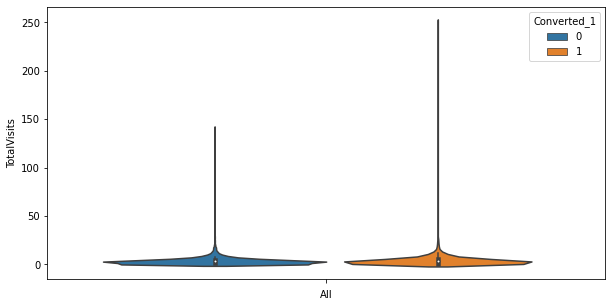

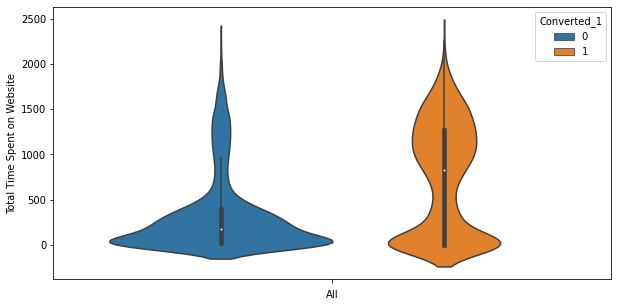

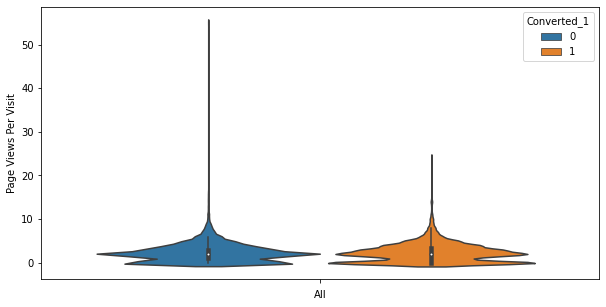

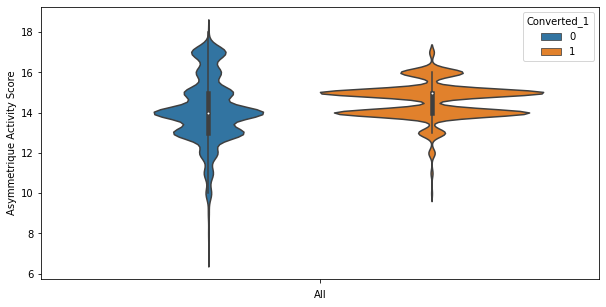

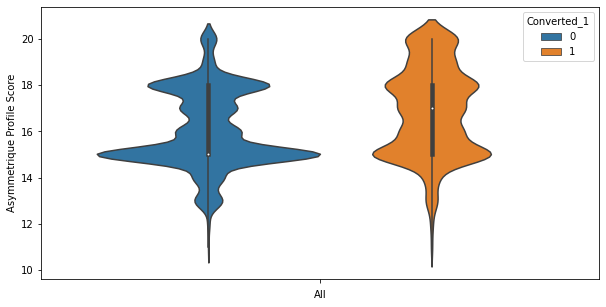

Lead Number              Lead Origin     Lead Source Do Not Email  \
0          660737                      API      Olark Chat           No   
1          660728                      API  Organic Search           No   
2          660727  Landing Page Submission  Direct Traffic           No   
3          660719  Landing Page Submission  Direct Traffic           No   
4          660681  Landing Page Submission          Google           No   
...           ...                      ...             ...          ...   
9235       579564  Landing Page Submission  Direct Traffic          Yes   
9236       579546  Landing Page Submission  Direct Traffic           No   
9237       579545  Landing Page Submission  Direct Traffic          Yes   
9238       579538  Landing Page Submission          Google           No   
9239       579533  Landing Page Submission  Direct Traffic           No   

     Do Not Call  TotalVisits  Total Time Spent on Website  \
0             No          0.0                            0   
1             No          5.0                          674   
2             No          2.0                         1532   
3             No          1.0                          305   
4             No          2.0                         1428   
...          ...          ...                          ...   
9235          No          8.0                         1845   
9236          No          2.0                          238   
9237          No          2.0                          199   
9238          No          3.0                          499   
9239          No          6.0                         1279   

      Page Views Per Visit            Last Activity       Country  \
0                     0.00  Page Visited on Website         India   
1                     2.50             Email Opened         India   
2                     2.00             Email Opened         India   
3                     1.00              Unreachable         India   
4                     1.00        Converted to Lead         India   
...                    ...                      ...           ...   
9235                  2.67        Email Marked Spam  Saudi Arabia   
9236                  2.00                 SMS Sent         India   
9237                  2.00                 SMS Sent         India   
9238                  3.00                 SMS Sent         India   
9239                  3.00                 SMS Sent    Bangladesh   

                 Specialization How did you hear about X Education  \
0                        Others                                NaN   
1                        Others                                NaN   
2       Business Administration                                NaN   
3         Media and Advertising                      Word Of Mouth   
4                        Others                              Other   
...                         ...                                ...   
9235     IT Projects Management                                NaN   
9236      Media and Advertising                                NaN   
9237    Business Administration                                NaN   
9238  Human Resource Management                      Online Search   
9239    Supply Chain Management                                NaN   

     What is your current occupation  \
0                         Unemployed   
1                         Unemployed   
2                            Student   
3                         Unemployed   
4                         Unemployed   
...                              ...   
9235                      Unemployed   
9236                      Unemployed   
9237                      Unemployed   
9238                      Unemployed   
9239                      Unemployed   

     What matters most to you in choosing a course Search Magazine  \
0                          Better Career Prospects     No       No   
1                          Better Career Prospects     No       No   

In [ ]:
# Violinplots for quant variables
df["All"] = ""
for i in df.columns:
  if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':
    plt.figure(figsize = (10,5))
    sns.violinplot(x = 'All',y = i, hue = "Converted_1", data = df)
    plt.show()
df.drop('All',axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


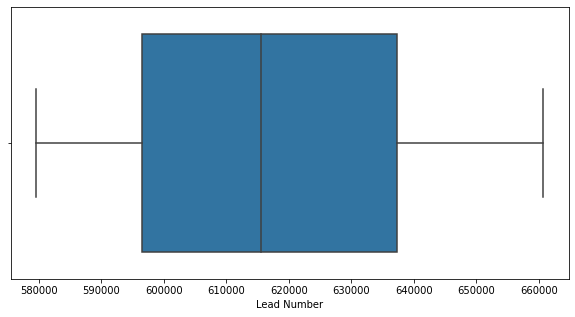

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


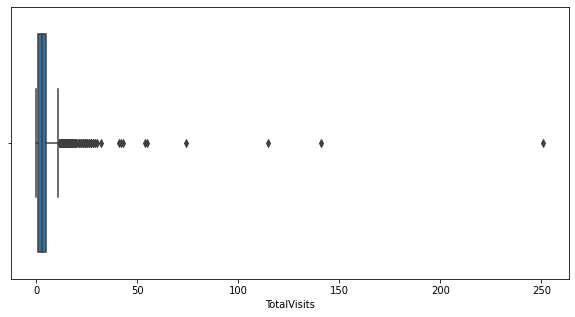

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


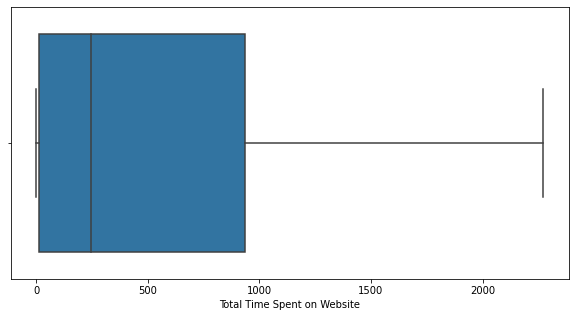

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


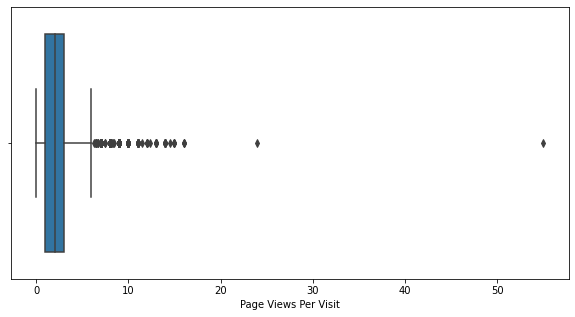

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


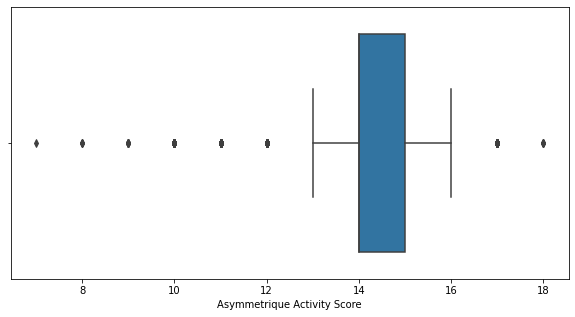

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


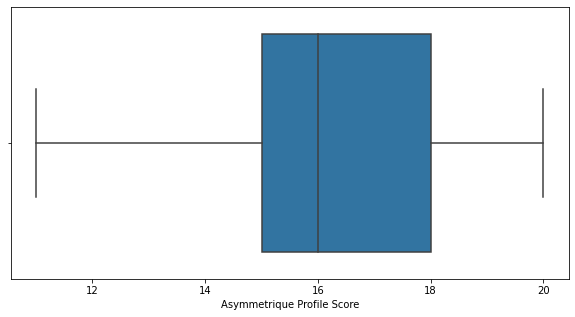

In [ ]:
# Outlier detection in quant varianbles 
for i in df.columns:
  if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':
    plt.figure(figsize = (10,5))
    sns.boxplot(df[i])
    plt.show()




In [ ]:
# Consider some crosstabs
print(pd.crosstab(df['Lead Source'],[df['Lead Quality'],df['Converted_1']]))
print(pd.crosstab(df['Lead Source'],[df['City'],df['Converted_1']]))

Lead Quality      High in Relevance      Low in Relevance      Might be       \
Converted_1                       0    1                0    1        0    1   
Lead Source                                                                    
Click2call                        1    0                0    1        0    1   
Direct Traffic                   10  124               26  111      136  302   
Facebook                          1    3                1    3        6    5   
Google                           12  162               39  166      130  397   
Live Chat                         0    0                0    0        0    1   
NC_EDM                            0    0                0    0        0    0   
Olark Chat                        2   44               13   47       34  100   
Organic Search                    3   65               15   59       59  147   
Pay per Click Ads                 0    0                0    0        0    0   
Press_Release                     0    0

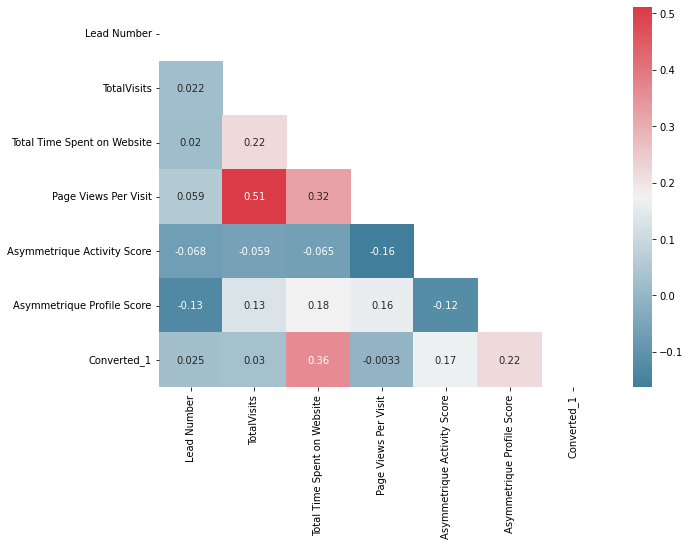

In [ ]:
# Correlation heatmap

corr = df.corr()
f, ax = plt.subplots(figsize=(10, 7))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

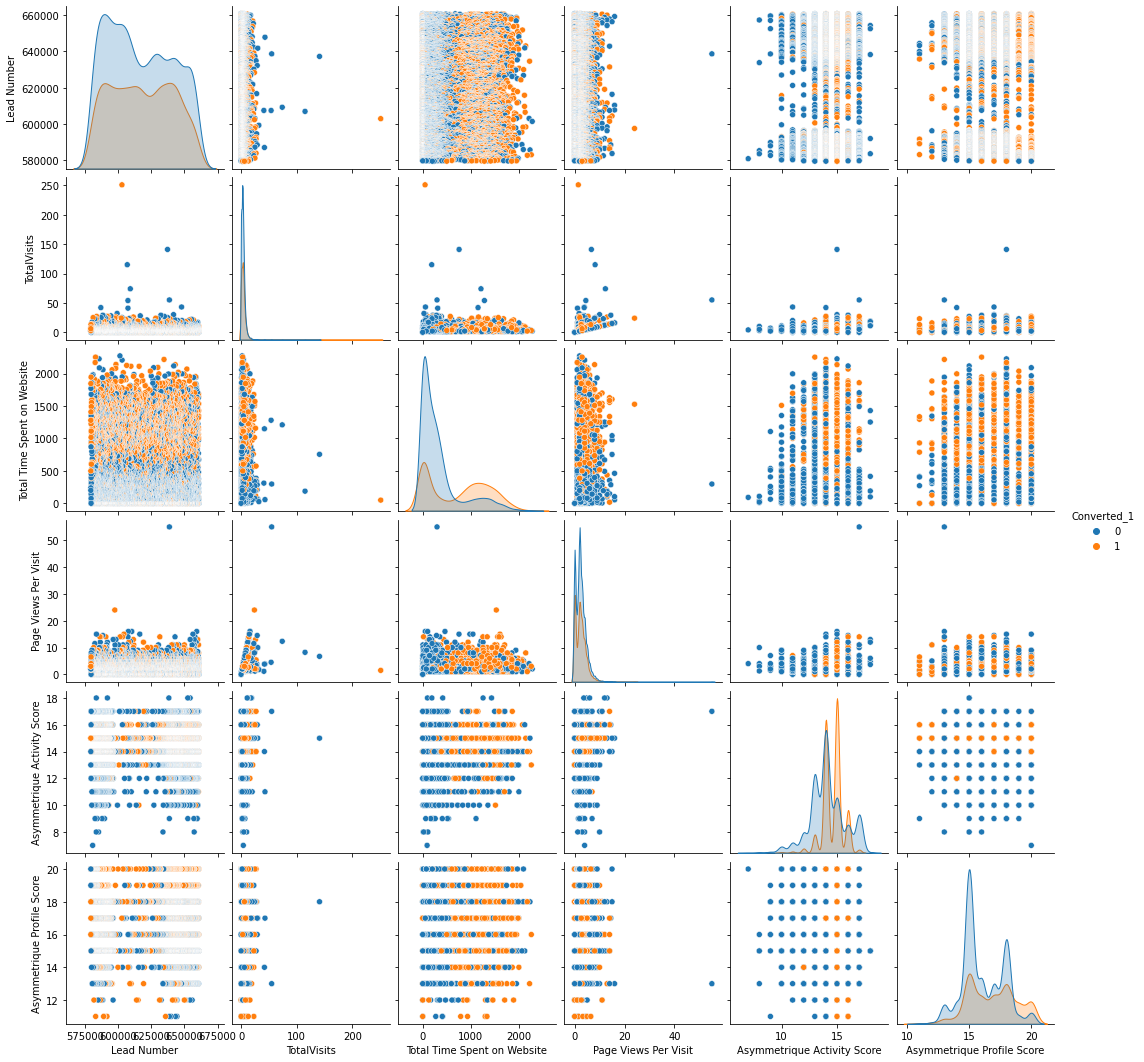

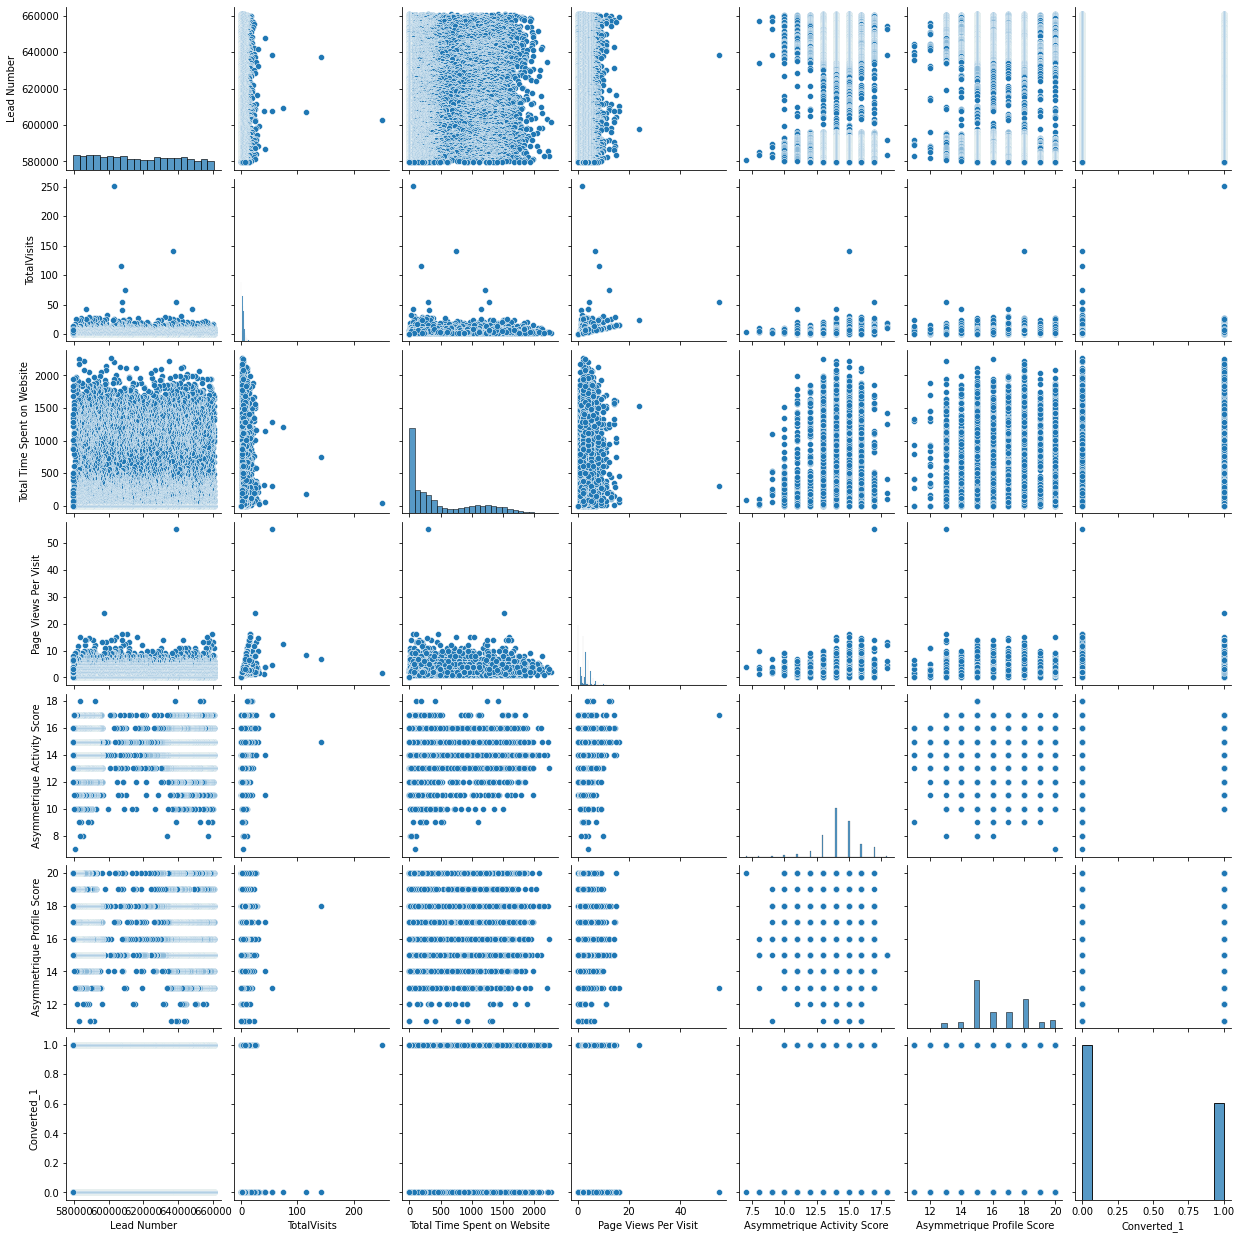

In [ ]:
sns.pairplot(df,hue='Converted_1')
sns.pairplot(df)

In [ ]:
# Evaluate skewness of quant variables
df.skew(axis=0,skipna=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Lead Number                     0.140451
TotalVisits                    19.911657
Total Time Spent on Website     0.956450
Page Views Per Visit            2.871793
Asymmetrique Activity Score    -0.383380
Asymmetrique Profile Score      0.221739
Converted_1                     0.471058
dtype: float64

#**Interactive Visualizations**

In [ ]:
# Plotly
fig = px.scatter_3d(df, z='TotalVisits', y='Total Time Spent on Website', x='Page Views Per Visit', color='Converted_1', hover_name='Converted_1')
# build jupyter dash app 
app = JupyterDash(__name__)
# add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
# run app inline
app.run_server(mode='inline') 



<IPython.core.display.Javascript object>

#**Automated Visualizations**

                                             |          | [  0%]   00:00 -> (? left)


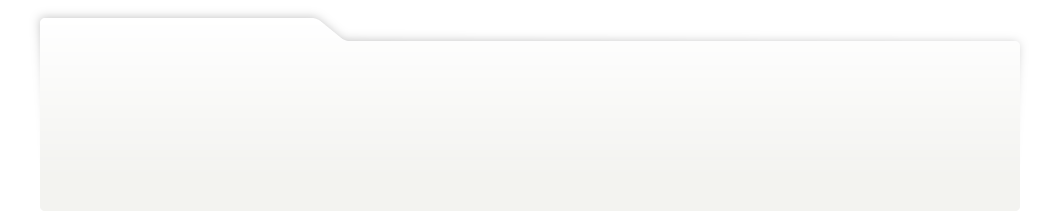
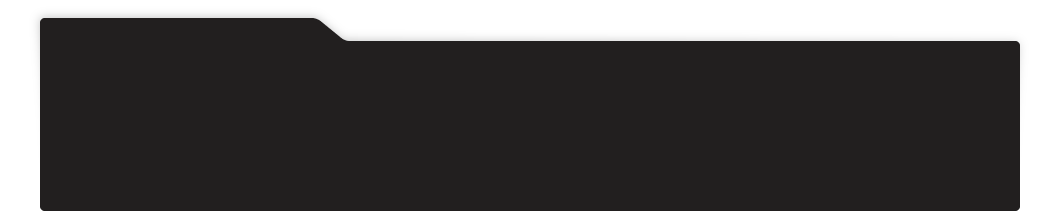
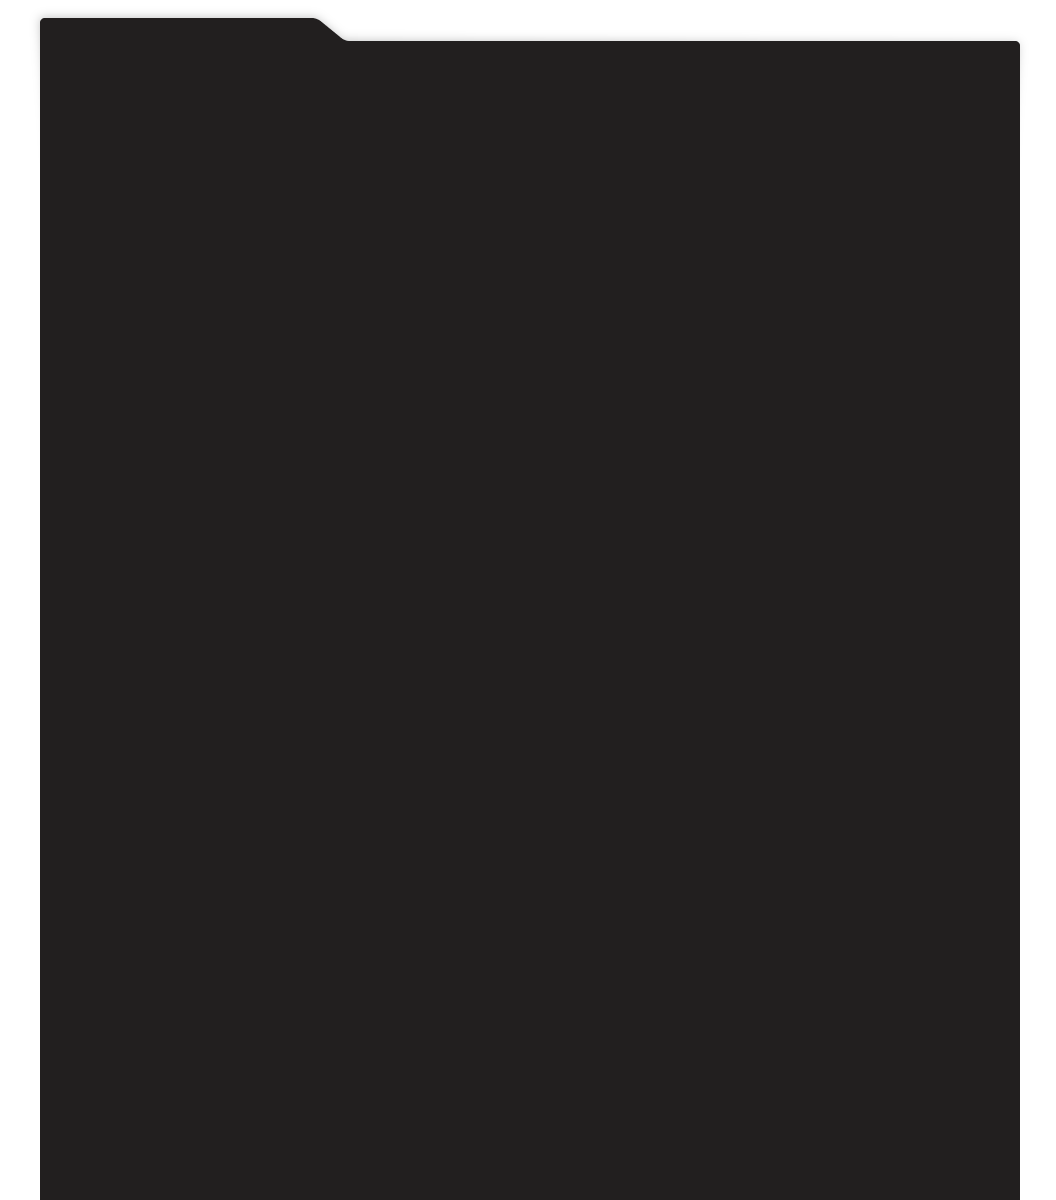
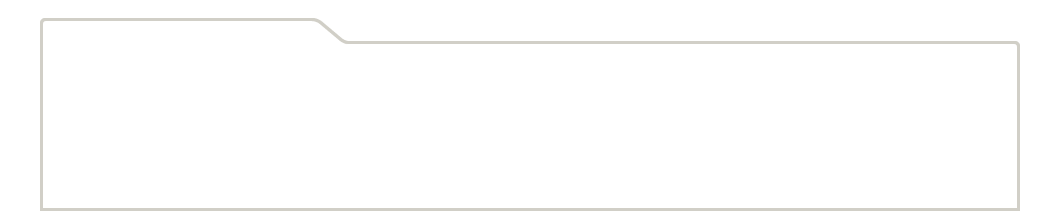
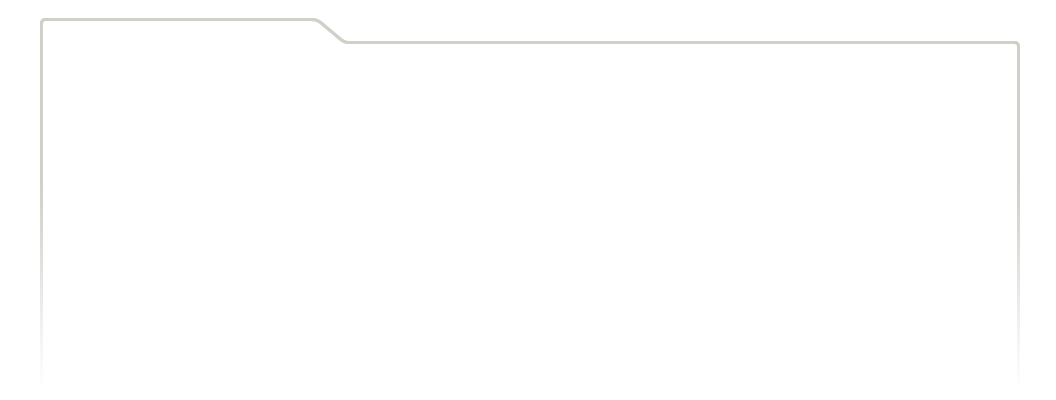
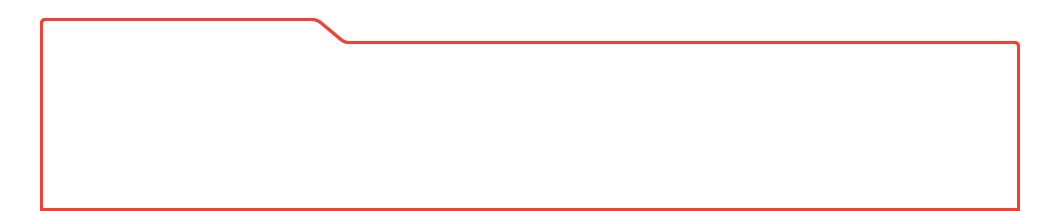
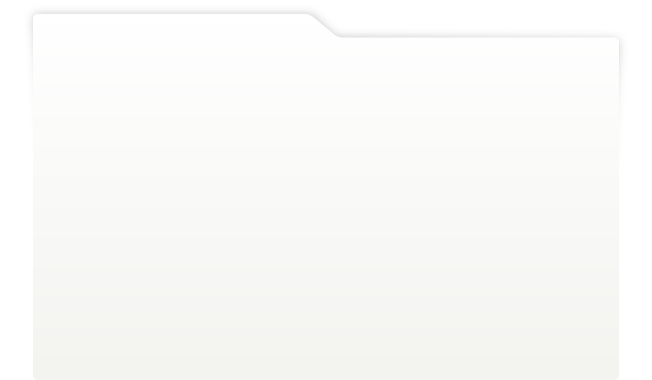
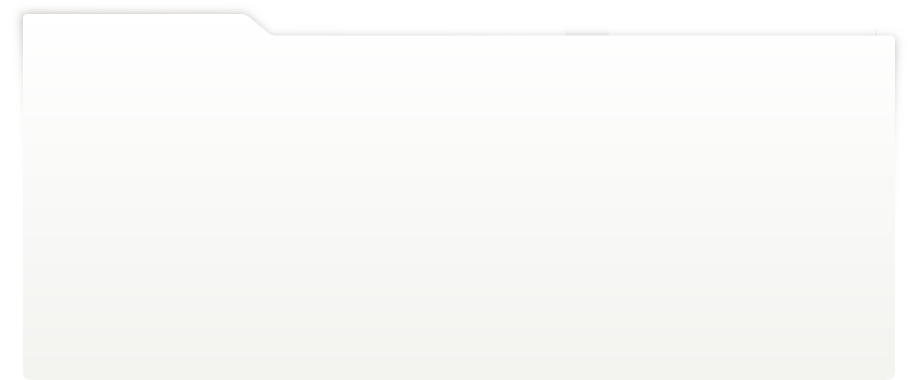
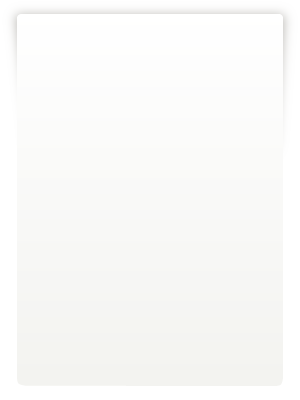
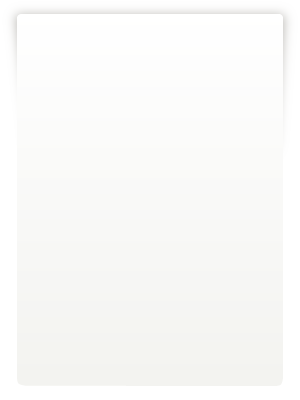
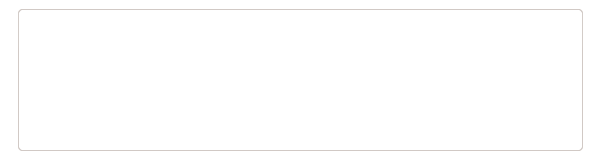
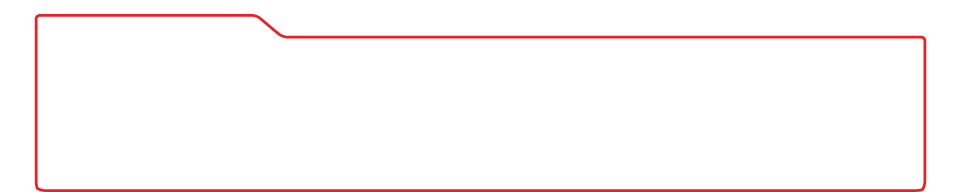
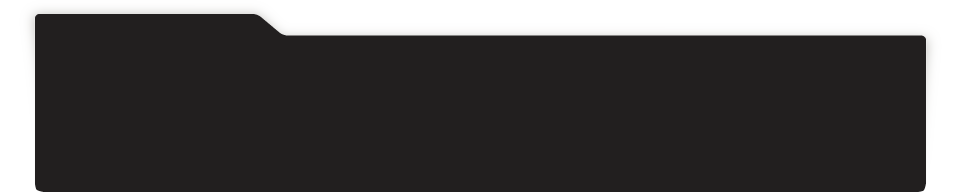
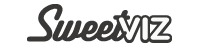
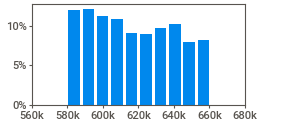
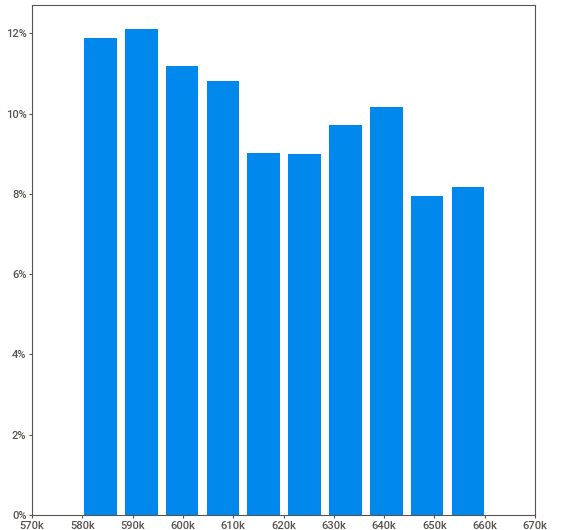
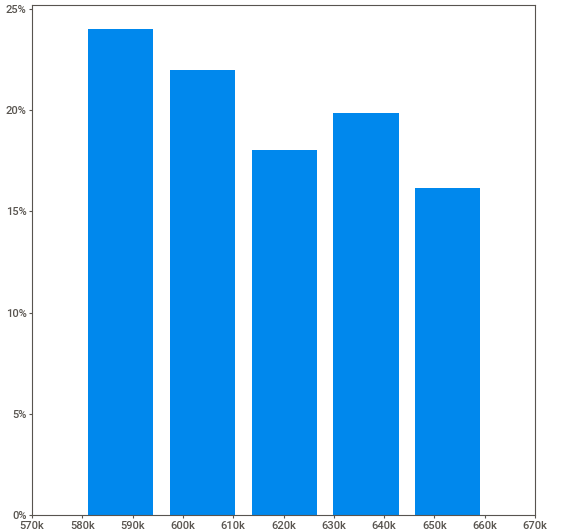
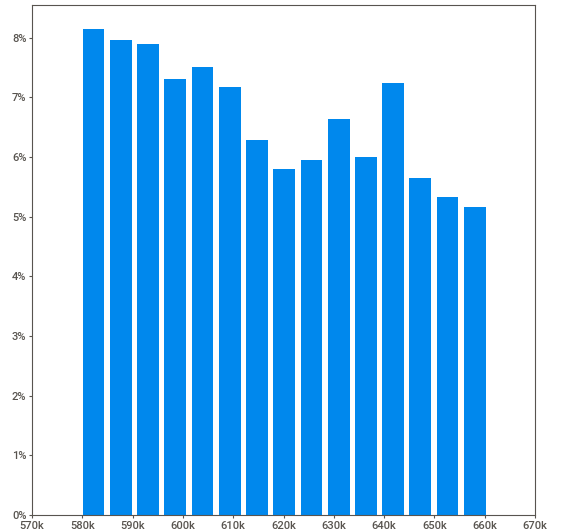
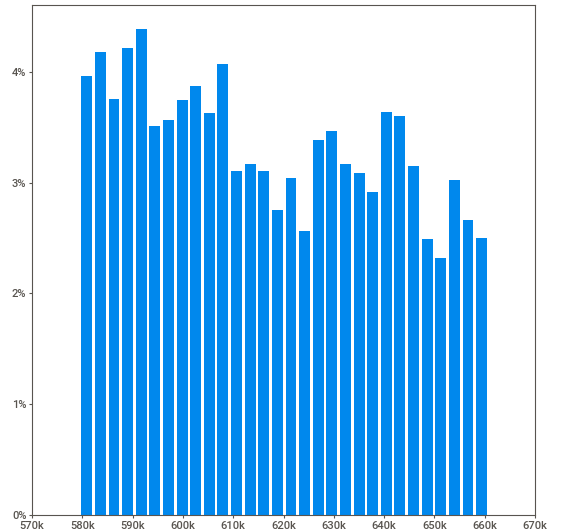
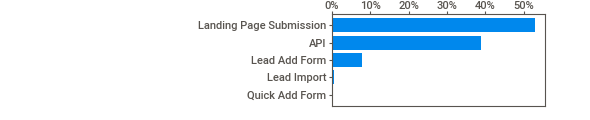
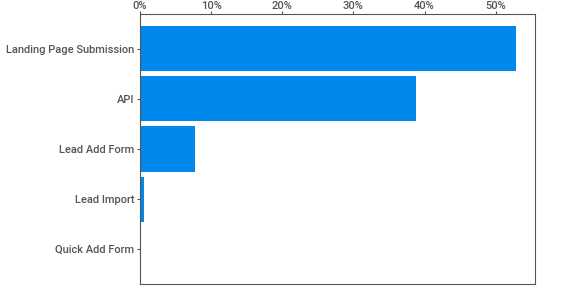
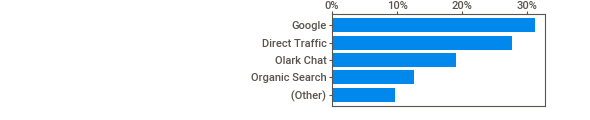
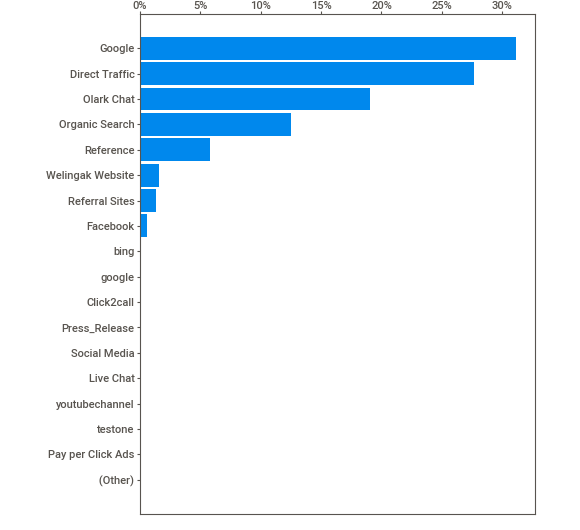
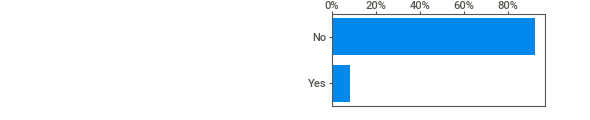
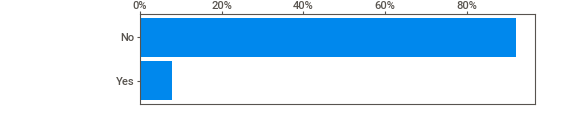
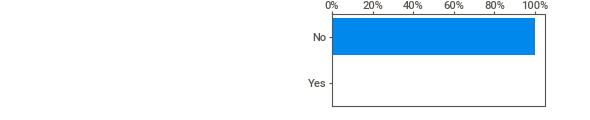
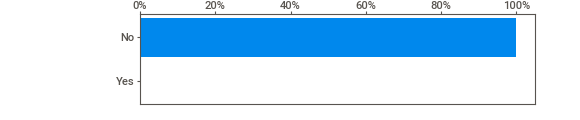
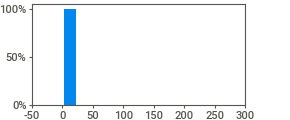
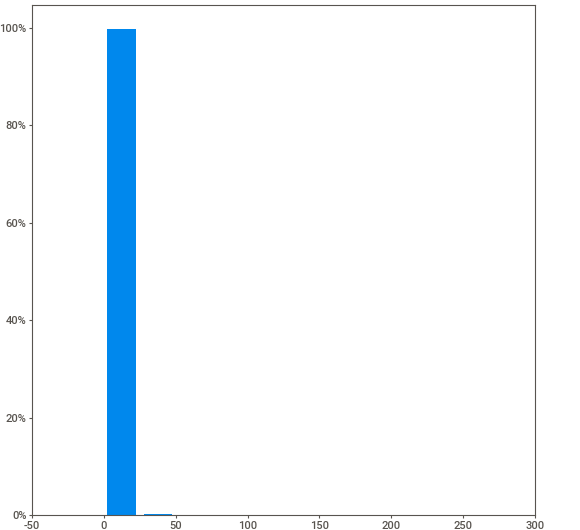
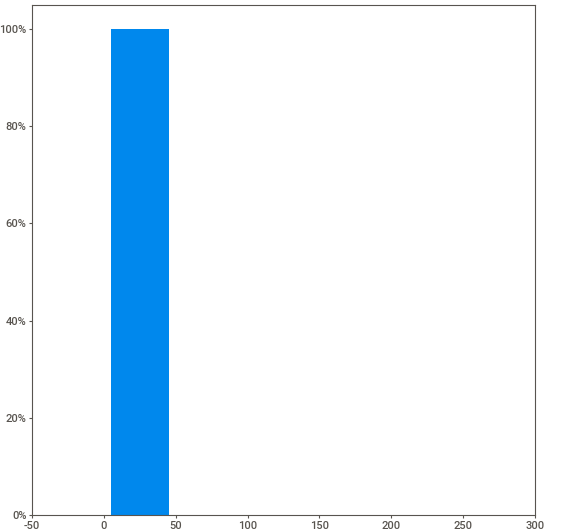
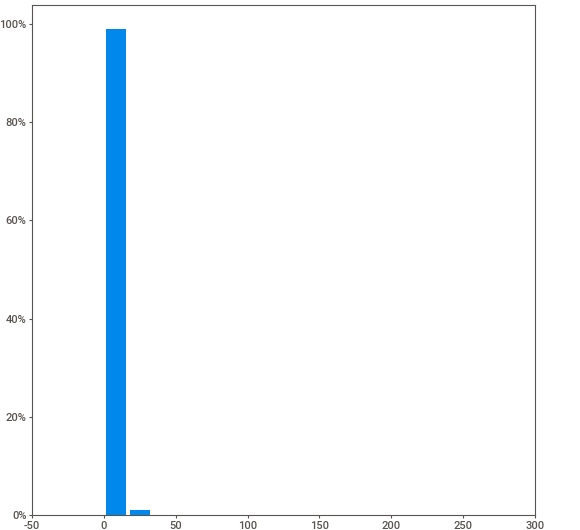
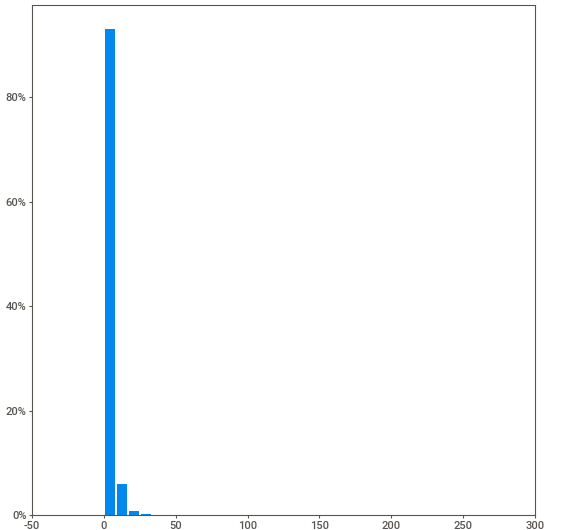
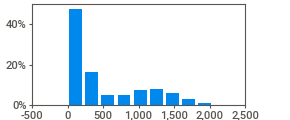
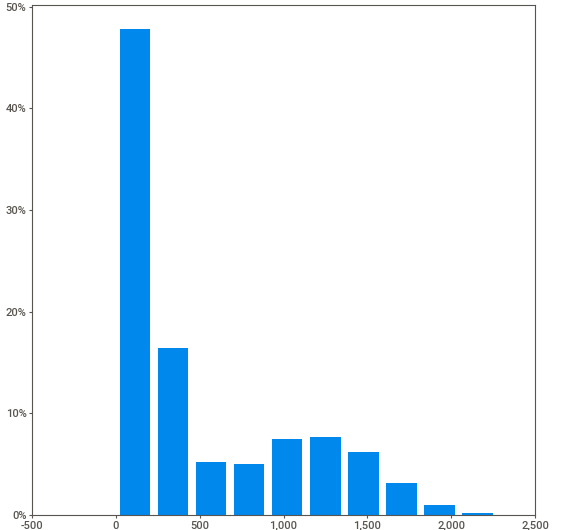
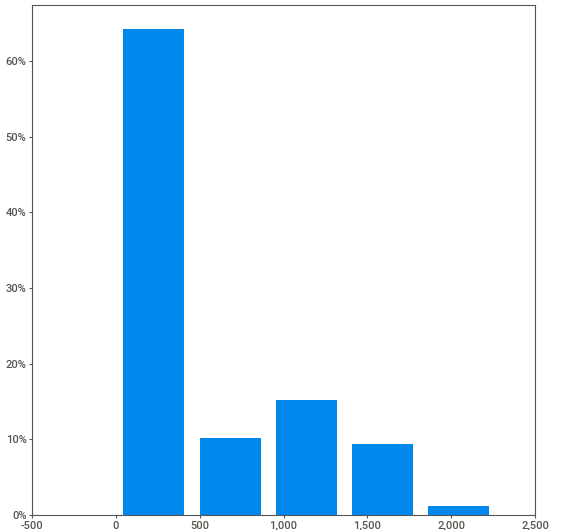
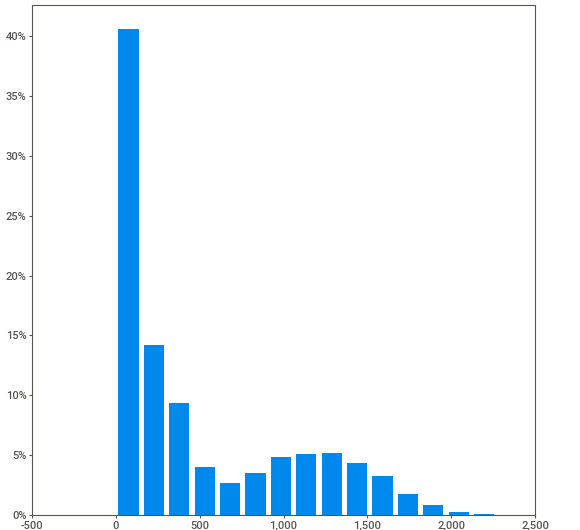
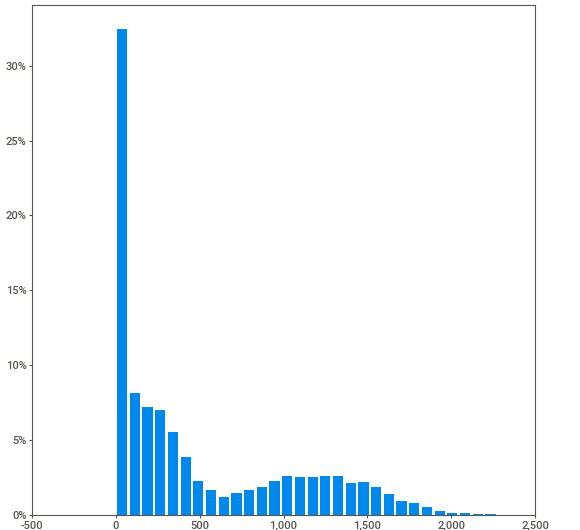
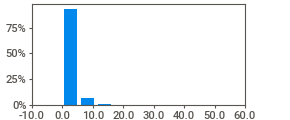
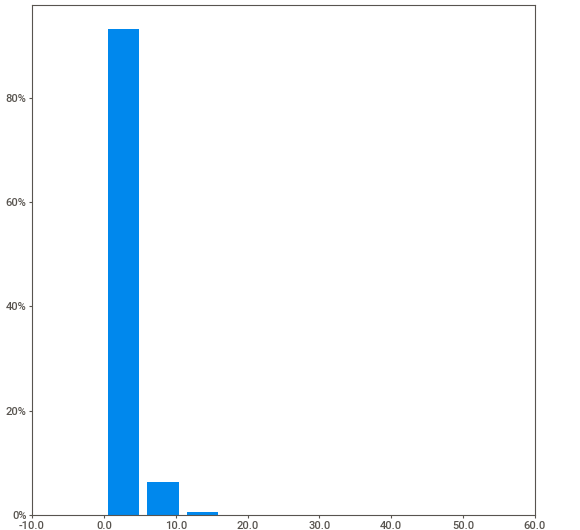
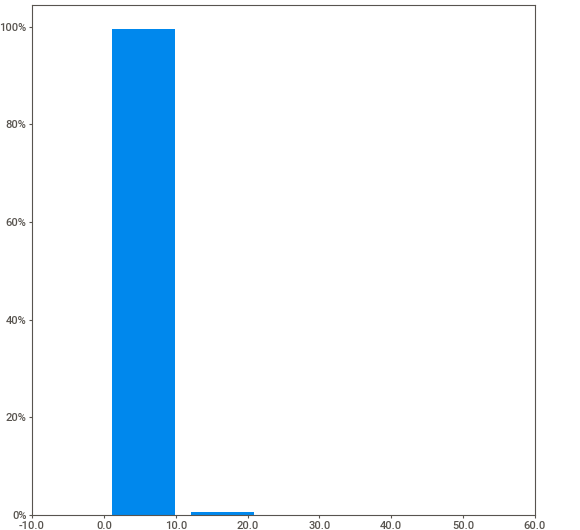
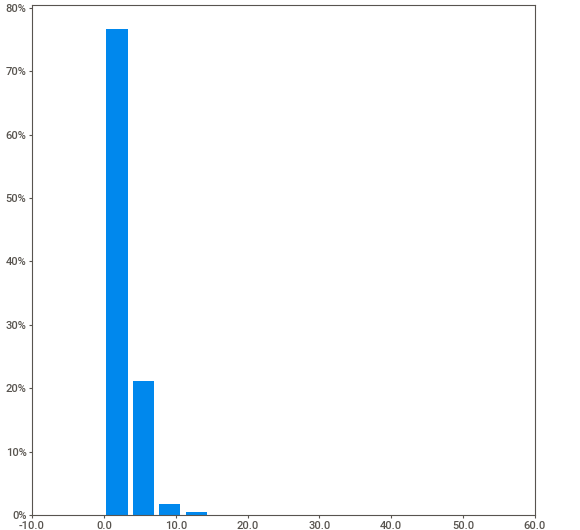
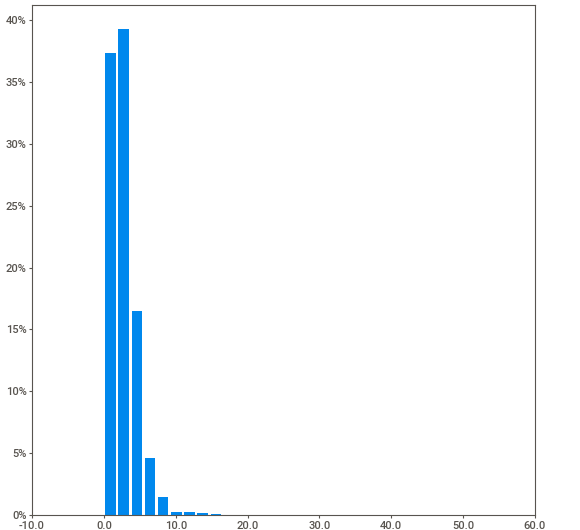
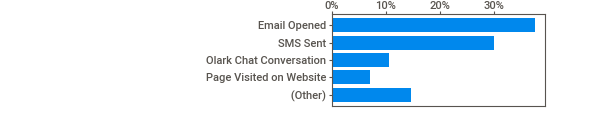
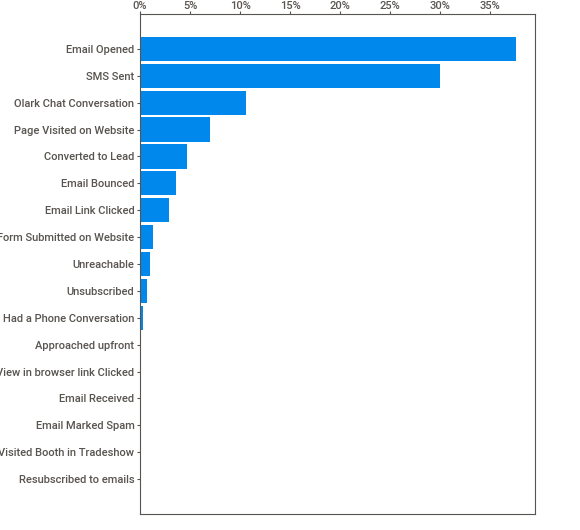
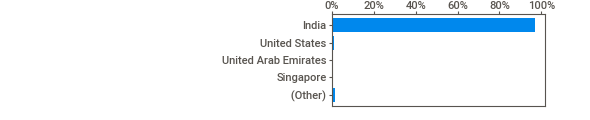
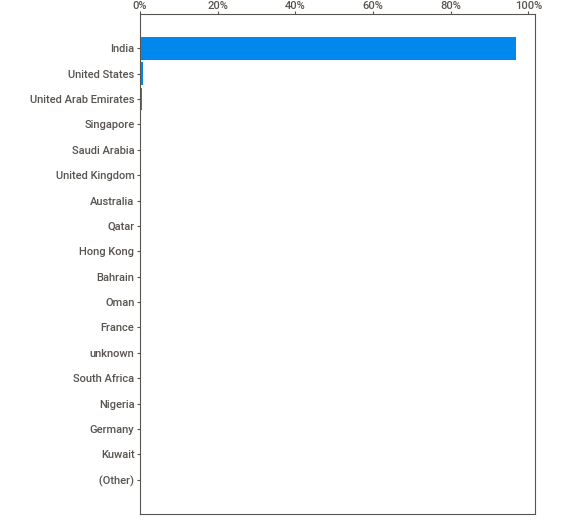
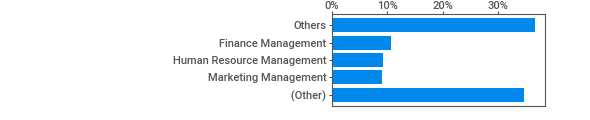
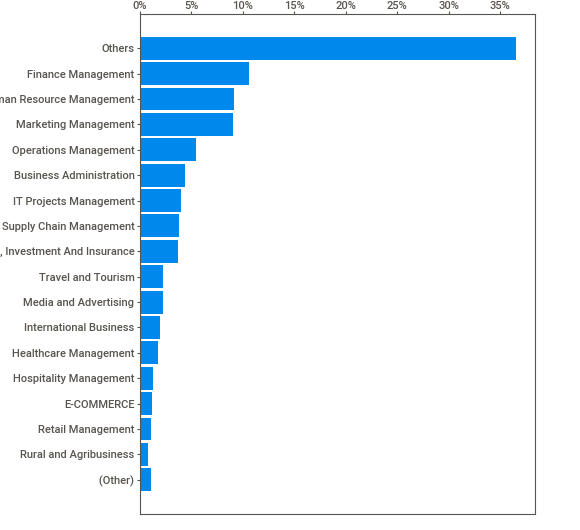
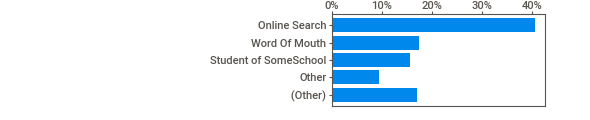
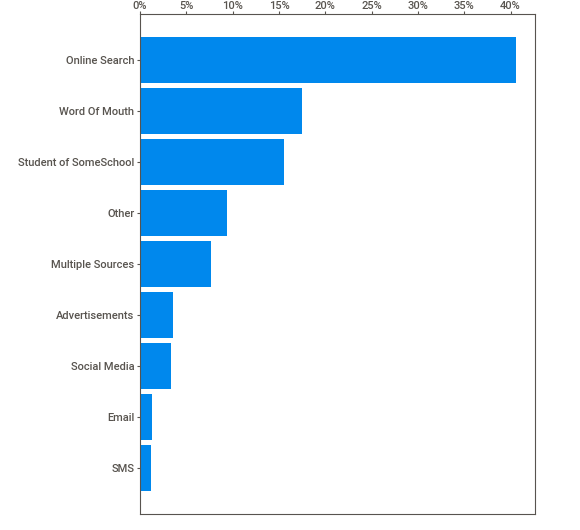
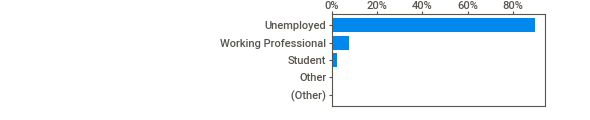
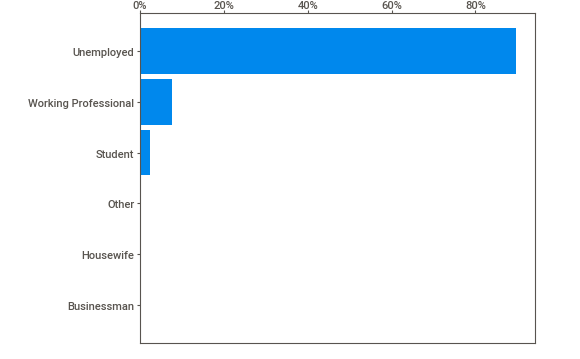
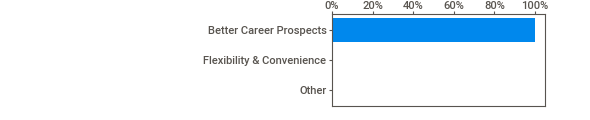
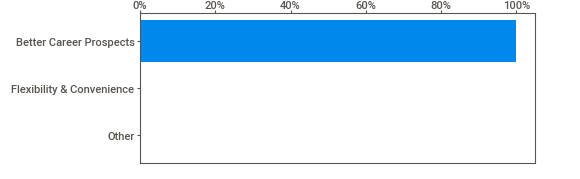
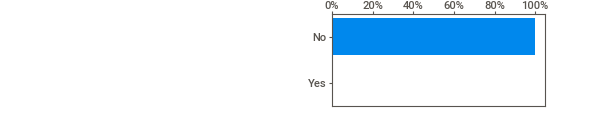
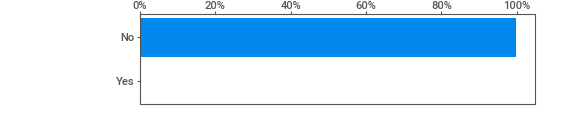
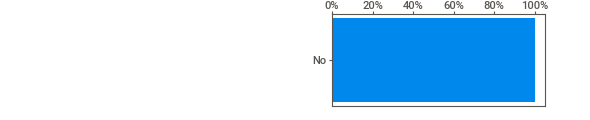
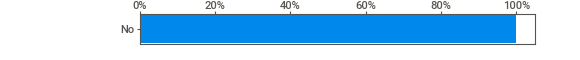
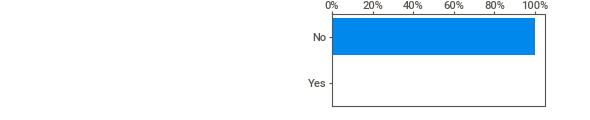
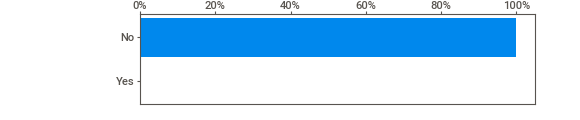
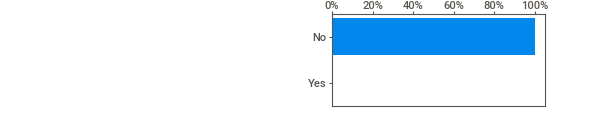
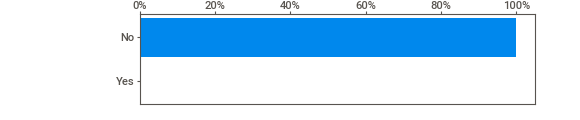
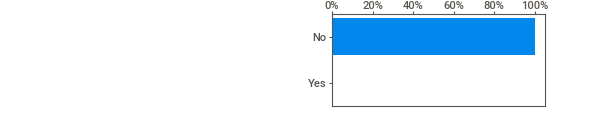
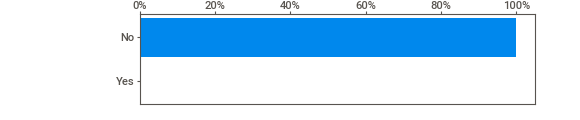
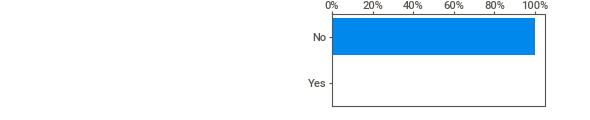
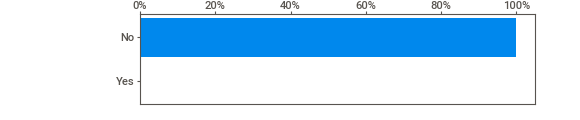
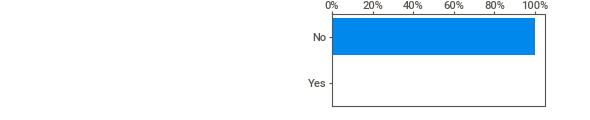
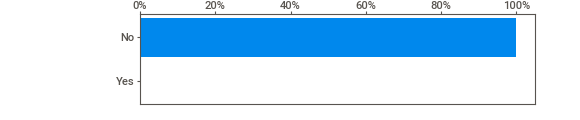
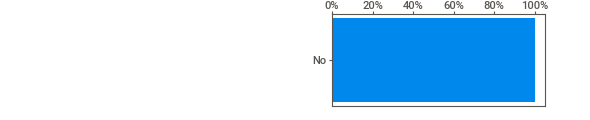
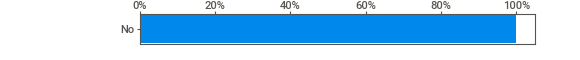
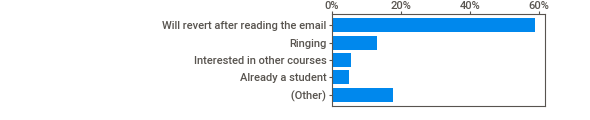
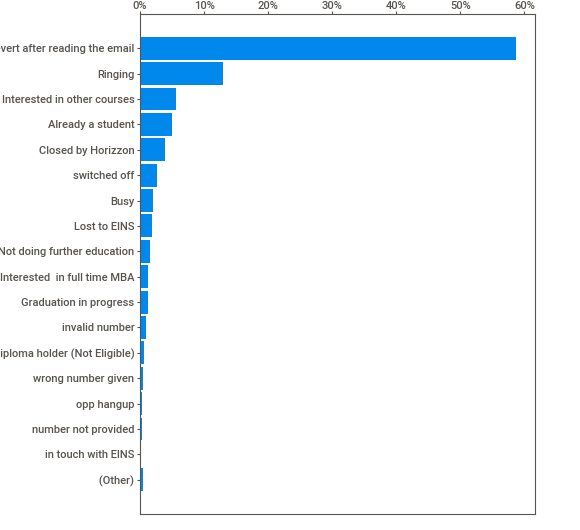
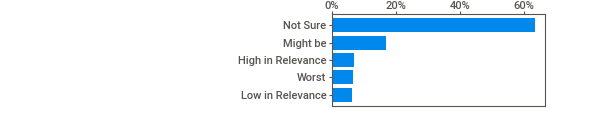
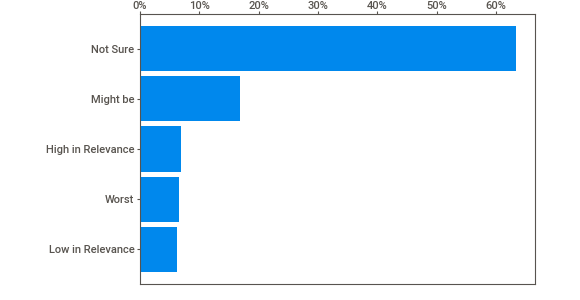
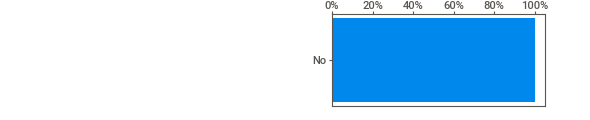
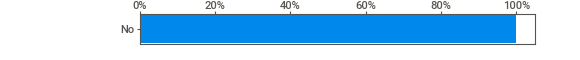
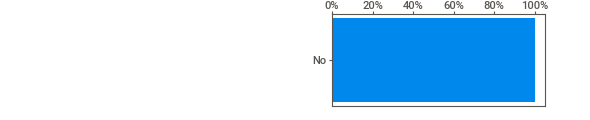
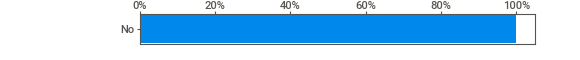
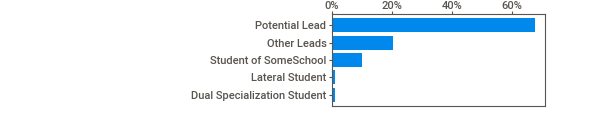
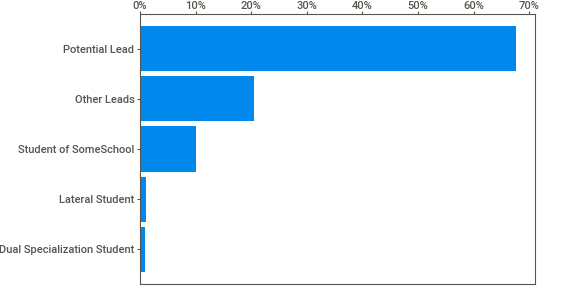
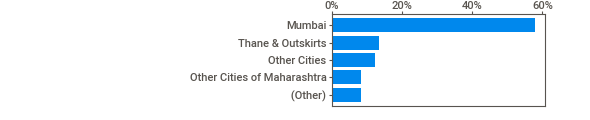
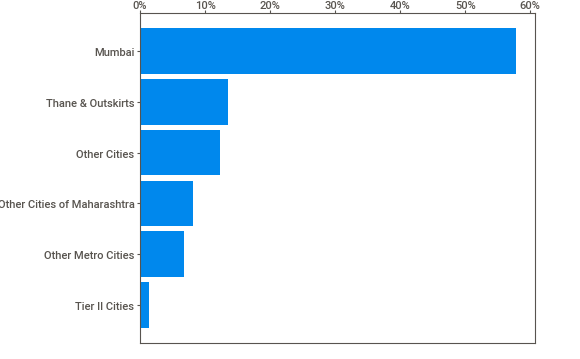
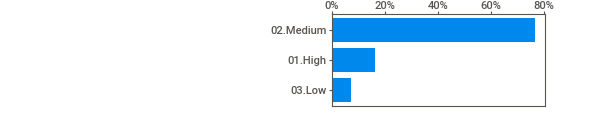
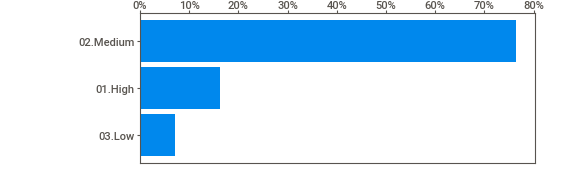
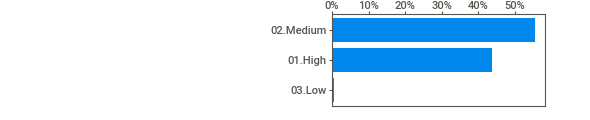
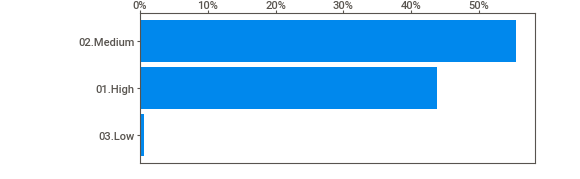
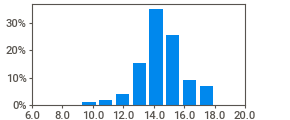
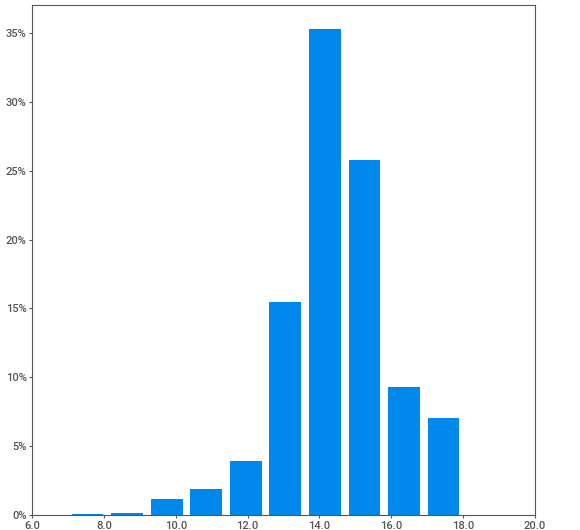
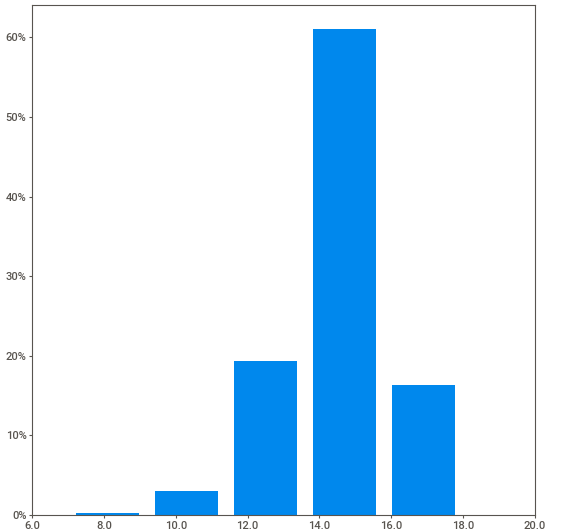
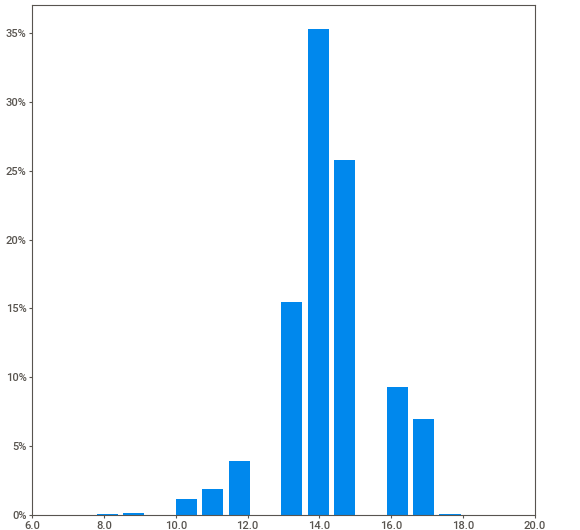
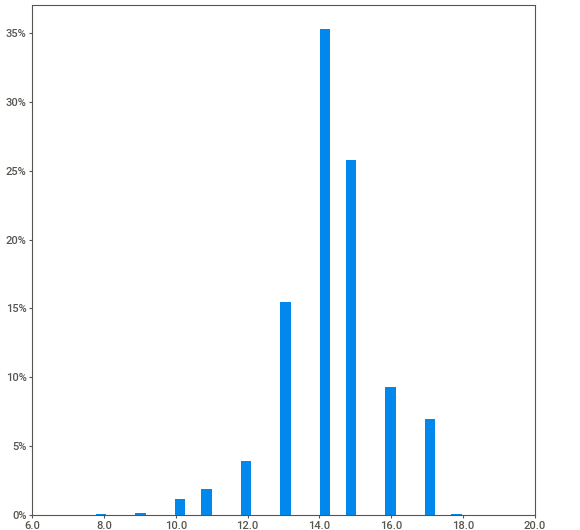
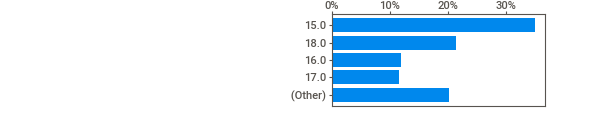
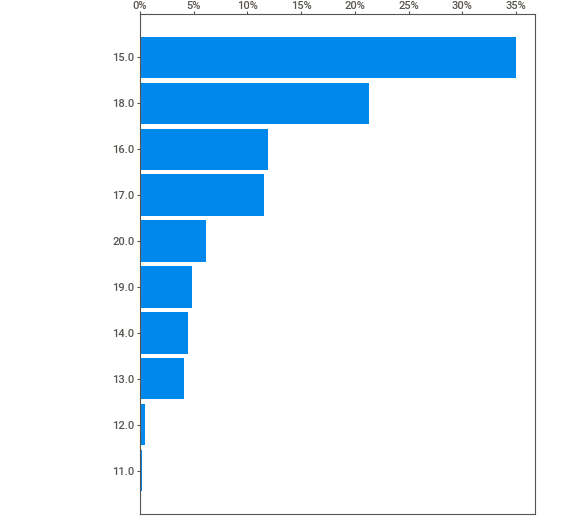
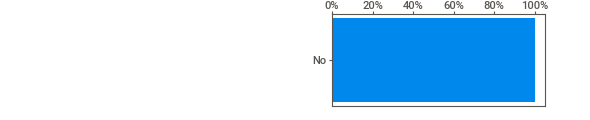
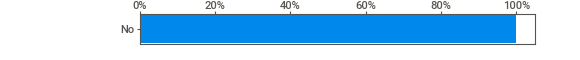
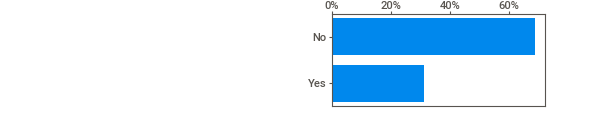
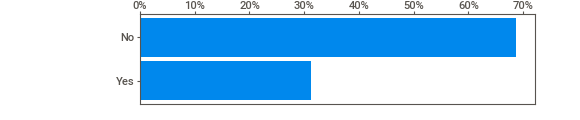
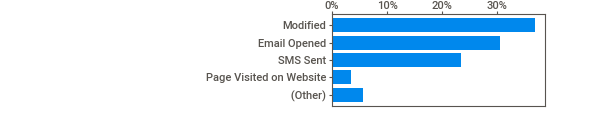
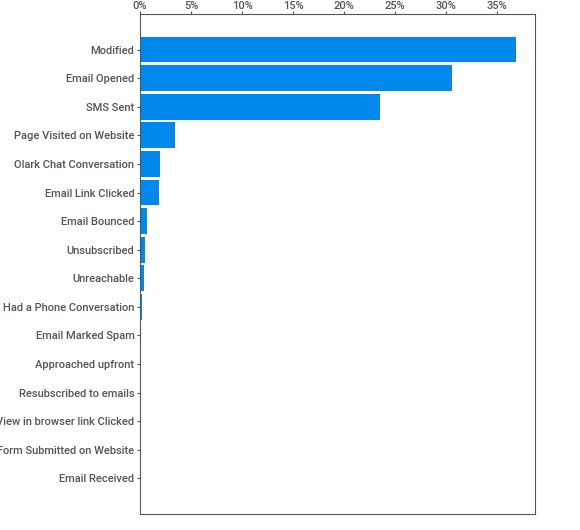
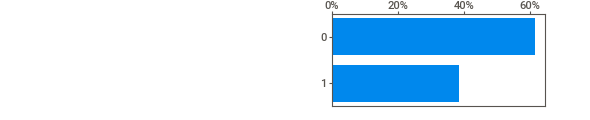
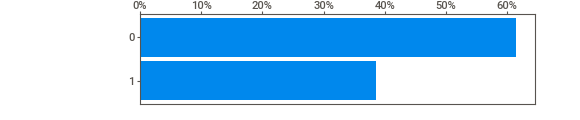
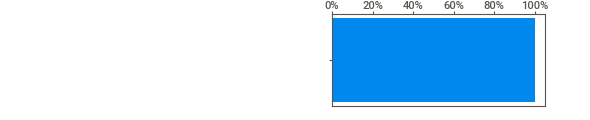
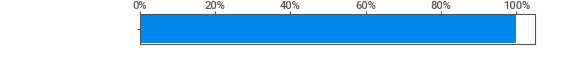
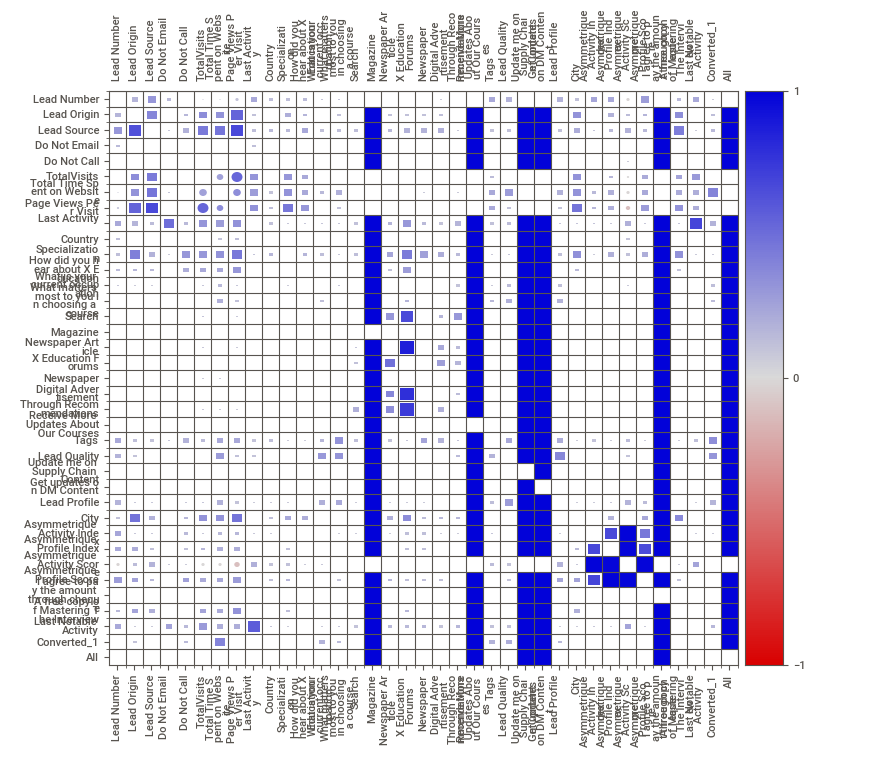
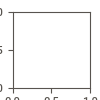

In [ ]:
# Sweetviz as an example of automated visualization

vizreport = sv.analyze(df)           
vizreport.show_notebook(layout='widescreen', w=1500, h=300, scale=0.7) #widescreen layout
#vizreport.show_notebook(layout='vertical', w=800, h=300, scale=0.7)   #vertical layout

In [ ]:
# AutoViz
# sep = ","
# dataf = AV.AutoViz(file_, depVar = 'Converted', sep=",", dfte=None, header=0, verbose=0, lowess=False, chart_format="html", max_rows_analyzed=2000, max_cols_analyzed=20,)

#**Conclusions**

*   Many features have missing values, and some have a majority of instances with missing values
*   There are no duplicates
*   One-hot encoding needed for categorical features, but the categories with low frequencies need to be bucketed first
*   The target ('Converted') is unbalanced (38.54%)
*   Many features have a dominant value and can likely be deleted
*   Quant variables can be trimmed to address outlier issue






